## Machine Learning -1 Graded Project Coded
- Anand B R
- PGPDSBA.O.JAN24

#### Clustering

### Digital Ads Data:

***The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.***

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_excel('Clustering+Clean+Ads_Data.xlsx')

In [6]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-10,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-9-1-22,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-9-3-20,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-9-4-15,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


In [7]:
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-9-13-7,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23062,2020-11-2-7,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,NaN,NaN,NaN
23063,2020-9-14-22,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,NaN,NaN,NaN
23064,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
23065,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN


In [8]:
df.shape

(23066, 19)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

In [10]:
df.isna().sum()[df.isna().sum() > 0]

CTR    4736
CPM    4736
CPC    4736
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.Timestamp = pd.to_datetime(df.Timestamp)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              23066 non-null  datetime64[ns]
 1   InventoryType          23066 non-null  object        
 2   Ad - Length            23066 non-null  int64         
 3   Ad- Width              23066 non-null  int64         
 4   Ad Size                23066 non-null  int64         
 5   Ad Type                23066 non-null  object        
 6   Platform               23066 non-null  object        
 7   Device Type            23066 non-null  object        
 8   Format                 23066 non-null  object        
 9   Available_Impressions  23066 non-null  int64         
 10  Matched_Queries        23066 non-null  int64         
 11  Impressions            23066 non-null  int64         
 12  Clicks                 23066 non-null  int64         
 13  S

In [14]:
df_num = df.select_dtypes(include=['int64', 'float64'])

In [15]:
df_cat = df.select_dtypes(include=['object'])

In [ ]:
from scipy.stats import Sh

In [16]:
df_num.shape, df_cat.shape

((23066, 13), (23066, 5))

In [17]:
for i in df_cat.columns:
    print(f'Column {i} Value counts')
    print('_'*40)
    print(df_cat[i].value_counts())
    print('*'*40)

Column InventoryType Value counts
________________________________________
InventoryType
Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: count, dtype: int64
****************************************
Column Ad Type Value counts
________________________________________
Ad Type
Inter224    1658
Inter217    1655
Inter223    1654
Inter219    1650
Inter221    1650
Inter222    1649
Inter229    1648
Inter227    1647
Inter218    1645
inter230    1644
Inter220    1644
Inter225    1643
Inter226    1640
Inter228    1639
Name: count, dtype: int64
****************************************
Column Platform Value counts
________________________________________
Platform
Video    9873
Web      8251
App      4942
Name: count, dtype: int64
****************************************
Column Device Type Value counts
________________________________________
Device Type
Mobile     14806
Desktop     8260
Name: count, dtype: int64
*****************

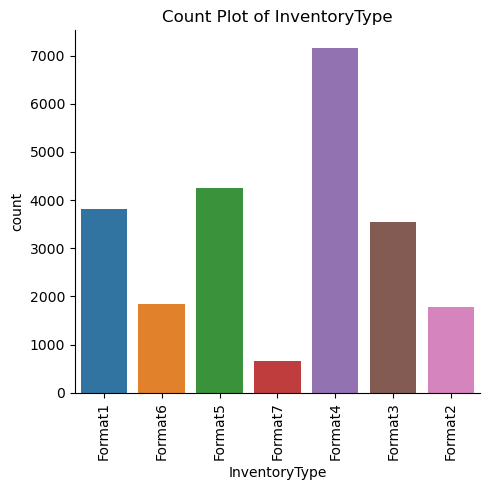

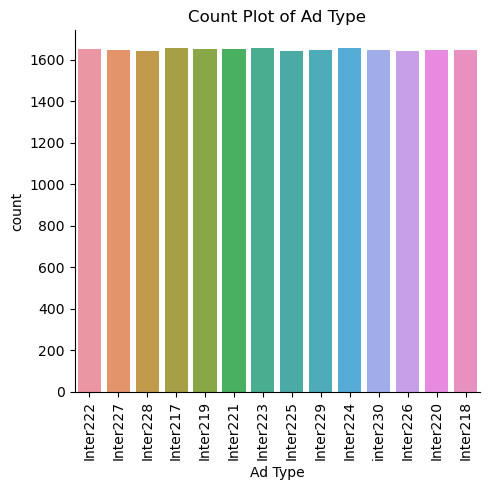

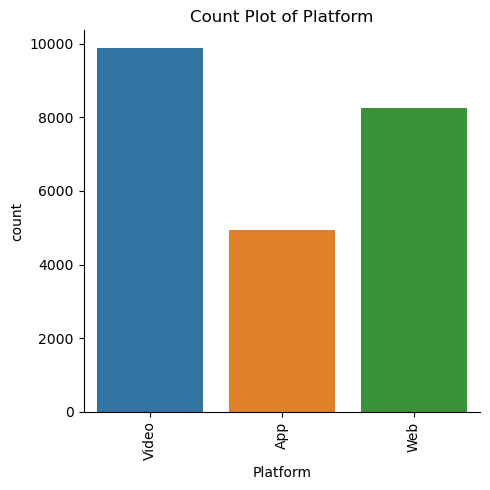

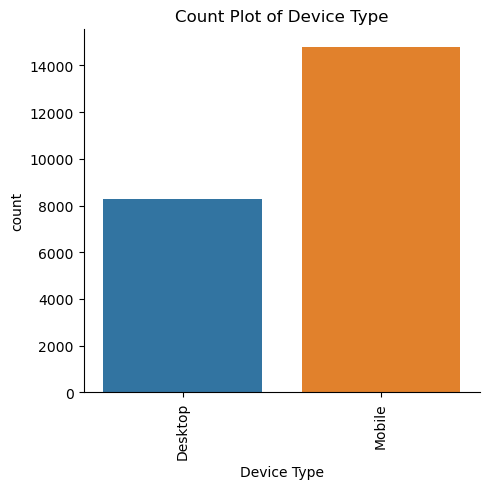

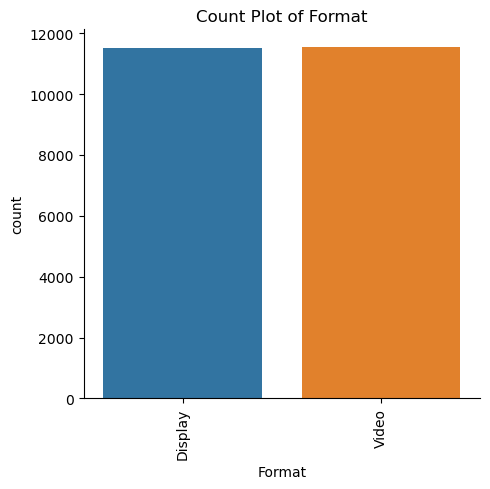

In [18]:
for i in df_cat.columns:  
    sns.catplot(data=df, kind='count', x = i)
    plt.xticks(rotation = 90)
    plt.title(f'Count Plot of {i}')
    plt.tight_layout()
    plt.savefig(f'{i}.jpg')
    plt.show()

In [19]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,3.851631e+02,2.336514e+02,120.0000,120.000000,300.00000,7.200000e+02,728.00
Ad- Width,23066.0,3.378960e+02,2.030929e+02,70.0000,250.000000,300.00000,6.000000e+02,600.00
Ad Size,23066.0,9.667447e+04,6.153833e+04,33600.0000,72000.000000,72000.00000,8.400000e+04,216000.00
Available_Impressions,23066.0,2.432044e+06,4.742888e+06,1.0000,33672.250000,483771.00000,2.527712e+06,27592861.00
Matched_Queries,23066.0,1.295099e+06,2.512970e+06,1.0000,18282.500000,258087.50000,1.180700e+06,14702025.00
Impressions,23066.0,1.241520e+06,2.429400e+06,1.0000,7990.500000,225290.00000,1.112428e+06,14194774.00
Clicks,23066.0,1.067852e+04,1.735341e+04,1.0000,710.000000,4425.00000,1.279375e+04,143049.00
Spend,23066.0,2.706626e+03,4.067927e+03,0.0000,85.180000,1425.12500,3.121400e+03,26931.87
Fee,23066.0,3.351231e-01,3.196322e-02,0.2100,0.330000,0.35000,3.500000e-01,0.35
Revenue,23066.0,1.924252e+03,3.105238e+03,0.0000,55.365375,926.33500,2.091338e+03,21276.18


***Note Feature Scaling is required***

```
CPM = (Total Campaign Spend / Number of Impressions) * 1,000. Note that the Total Campaign Spend refers to the 'Spend' Column in the dataset and the Number of Impressions refers to the 'Impressions' Column in the dataset. 

CPC = Total Cost (spend) / Number of Clicks.  Note that the Total Cost (spend) refers to the 'Spend' Column in the dataset and the Number of Clicks refers to the 'Clicks' Column in the dataset. 

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100. Note that the Total Measured Clicks refers to the 'Clicks' Column in the dataset and the Total Measured Ad Impressions refers to the 'Impressions' Column in the dataset.
```

In [22]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-09-02 17:00:00,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-09-02 10:00:00,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.0035,0.0,0.0
2,2020-09-01 22:00:00,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.0028,0.0,0.0
3,2020-09-03 20:00:00,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.0020,0.0,0.0
4,2020-09-04 15:00:00,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.0041,0.0,0.0


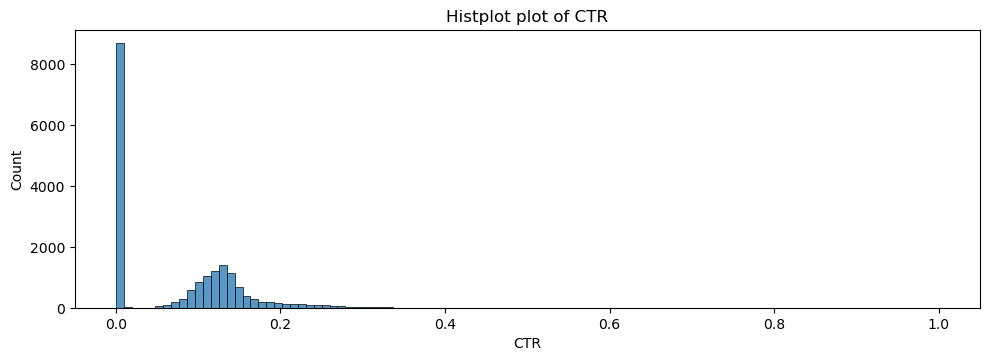

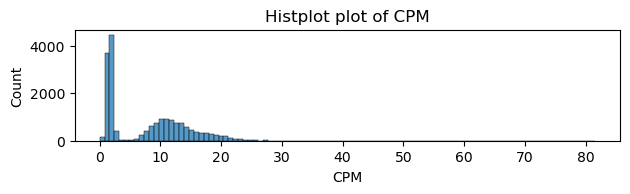

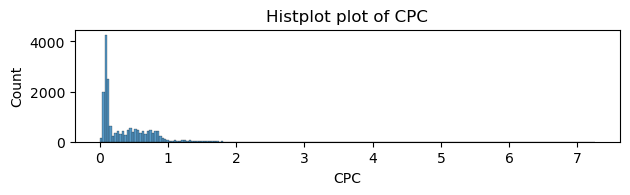

In [23]:
plt.figure(figsize=(10,10))
metrics = ['CTR','CPM','CPC']
for i in range(0, len(metrics)):
    plt.subplot(3, 1, i+1)
    sns.histplot(data= df, x = df[metrics[i]])
    plt.title(f'Histplot plot of {metrics[i]}')
    plt.tight_layout()
    plt.show()


In [24]:
df.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC'],
      dtype='object')

In [25]:
class AdFeatures:
    def __init__(self, df):
        self.df = df
    
    def CTR_cal(self):
        x = self.df['Clicks']
        y = self.df['Impressions']
        return (x/y) * 100
    
    def CPM_cal(self):
        i = self.df['Spend']
        j = self.df['Impressions']
        return (i/j)*1000
    
    def CPC_cal(self):
        a = self.df['Spend']
        b = self.df['Clicks']
        return (a/b)

In [26]:
ad_class = AdFeatures(df)

In [27]:
df['CTR'] = ad_class.CTR_cal()

In [28]:
df['CPM'] = ad_class.CPM_cal()

In [29]:
df['CPC'] = ad_class.CPC_cal()

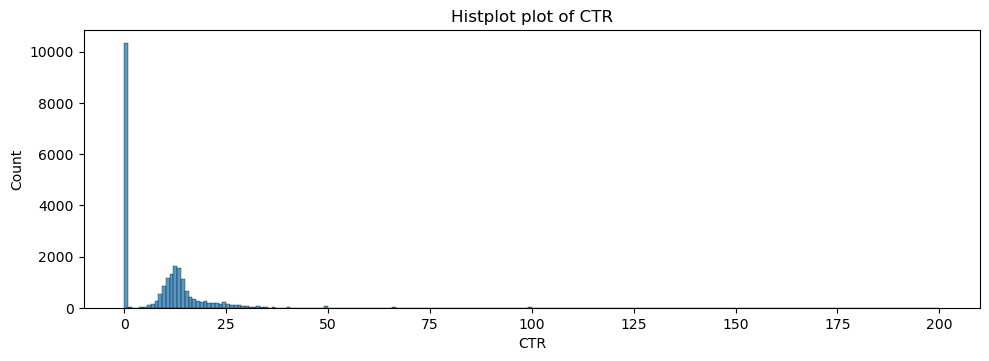

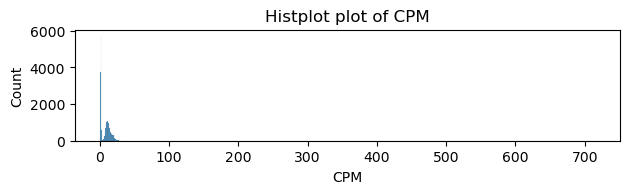

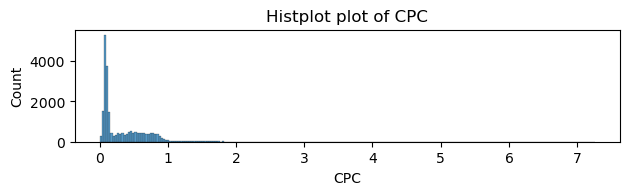

In [30]:
plt.figure(figsize=(10,10))
metrics = ['CTR','CPM','CPC']
for i in range(0, len(metrics)):
    plt.subplot(3, 1, i+1)
    sns.histplot(data= df, x = df[metrics[i]])
    plt.title(f'Histplot plot of {metrics[i]}')
    plt.tight_layout()
    plt.show()


In [31]:
df.tail(10)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23056,2020-11-23 04:00:00,Format4,120,600,72000,Inter223,Web,Mobile,Video,2,2,2,1,0.10,0.35,0.0650,50.0,50.0,0.10
23057,2020-11-20 02:00:00,Format4,120,600,72000,Inter224,Web,Desktop,Display,5,2,2,1,0.07,0.35,0.0455,50.0,35.0,0.07
23058,2020-11-04 03:00:00,Format5,720,300,216000,Inter223,Web,Mobile,Video,1,1,1,1,0.08,0.35,0.0520,100.0,80.0,0.08
23059,2020-11-13 04:00:00,Format5,720,300,216000,Inter228,Video,Mobile,Display,2,2,2,1,0.07,0.35,0.0455,50.0,35.0,0.07
23060,2020-11-16 05:00:00,Format4,120,600,72000,Inter225,Video,Mobile,Display,4,4,4,1,0.14,0.35,0.0910,25.0,35.0,0.14
23061,2020-09-13 07:00:00,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,100.0,70.0,0.07
23062,2020-11-02 07:00:00,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,50.0,20.0,0.04
23063,2020-09-14 22:00:00,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,100.0,50.0,0.05
23064,2020-11-18 02:00:00,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,100.0,70.0,0.07
23065,2020-09-14 00:00:00,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,50.0,45.0,0.09


In [32]:
df.duplicated().sum()

0

In [33]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Timestamp,23066,2020-10-14 05:53:46.671290880,2020-09-01 16:00:00,2020-09-23 06:00:00,2020-10-14 09:00:00,2020-11-04 09:00:00,2020-11-24 18:00:00,NaN
Ad - Length,23066.0,385.163097,120.0,120.0,300.0,720.0,728.0,233.651434
Ad- Width,23066.0,337.896037,70.0,250.0,300.0,600.0,600.0,203.092885
Ad Size,23066.0,96674.468048,33600.0,72000.0,72000.0,84000.0,216000.0,61538.329557
Available_Impressions,23066.0,2432043.665872,1.0,33672.25,483771.0,2527711.75,27592861.0,4742887.764666
Matched_Queries,23066.0,1295099.143241,1.0,18282.5,258087.5,1180700.0,14702025.0,2512969.861258
Impressions,23066.0,1241519.518859,1.0,7990.5,225290.0,1112428.5,14194774.0,2429399.961091
Clicks,23066.0,10678.518816,1.0,710.0,4425.0,12793.75,143049.0,17353.409363
Spend,23066.0,2706.625689,0.0,85.18,1425.125,3121.4,26931.87,4067.927273
Fee,23066.0,0.335123,0.21,0.33,0.35,0.35,0.35,0.031963


In [34]:
df_num = df.select_dtypes(include=['int64', 'float64'])

In [35]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-09-02 17:00:00,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0
1,2020-09-02 10:00:00,Format1,300,250,75000,Inter227,App,Mobile,Video,1780,285,285,1,0.0,0.35,0.0,0.350877,0.0,0.0
2,2020-09-01 22:00:00,Format1,300,250,75000,Inter222,Video,Desktop,Display,2727,356,355,1,0.0,0.35,0.0,0.281690,0.0,0.0
3,2020-09-03 20:00:00,Format1,300,250,75000,Inter228,Video,Mobile,Video,2430,497,495,1,0.0,0.35,0.0,0.202020,0.0,0.0
4,2020-09-04 15:00:00,Format1,300,250,75000,Inter217,Web,Desktop,Video,1218,242,242,1,0.0,0.35,0.0,0.413223,0.0,0.0


In [36]:
df_num.tail()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,720,300,216000,1,1,1,1,0.07,0.35,0.0455,100.0,70.0,0.07
23062,720,300,216000,3,2,2,1,0.04,0.35,0.0260,50.0,20.0,0.04
23063,720,300,216000,2,1,1,1,0.05,0.35,0.0325,100.0,50.0,0.05
23064,120,600,72000,7,1,1,1,0.07,0.35,0.0455,100.0,70.0,0.07
23065,720,300,216000,2,2,2,1,0.09,0.35,0.0585,50.0,45.0,0.09


In [37]:
df.tail()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
23061,2020-09-13 07:00:00,Format5,720,300,216000,Inter220,Web,Mobile,Video,1,1,1,1,0.07,0.35,0.0455,100.0,70.0,0.07
23062,2020-11-02 07:00:00,Format5,720,300,216000,Inter224,Web,Desktop,Video,3,2,2,1,0.04,0.35,0.0260,50.0,20.0,0.04
23063,2020-09-14 22:00:00,Format5,720,300,216000,Inter218,App,Mobile,Video,2,1,1,1,0.05,0.35,0.0325,100.0,50.0,0.05
23064,2020-11-18 02:00:00,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,100.0,70.0,0.07
23065,2020-09-14 00:00:00,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,50.0,45.0,0.09


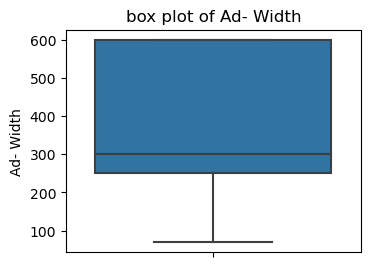

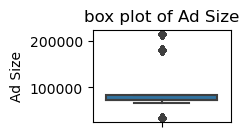

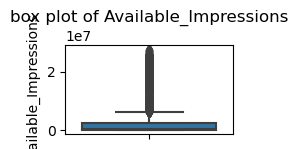

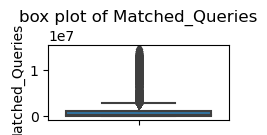

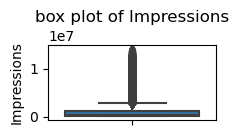

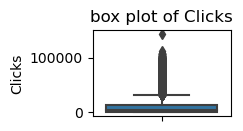

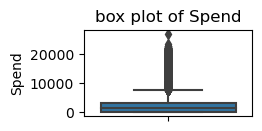

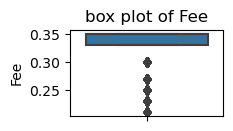

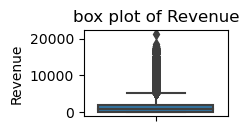

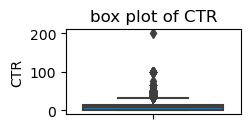

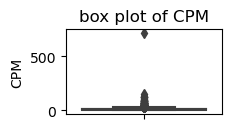

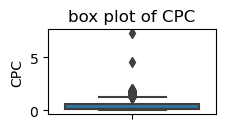

In [38]:
plt.figure(figsize=(10,10))
num_cols = df_num.columns
for i in range(1, len(num_cols)):
    plt.subplot(4, 3, i)
    sns.boxplot(data= df, y = df[num_cols[i]])
    plt.title(f'box plot of {num_cols[i]}')
    plt.tight_layout()
    plt.show()

The description statistics for Ad - Length column is: 


count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64


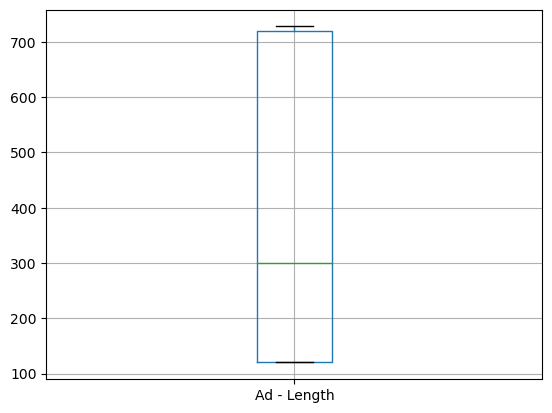

The description statistics for Ad- Width column is: 


count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64


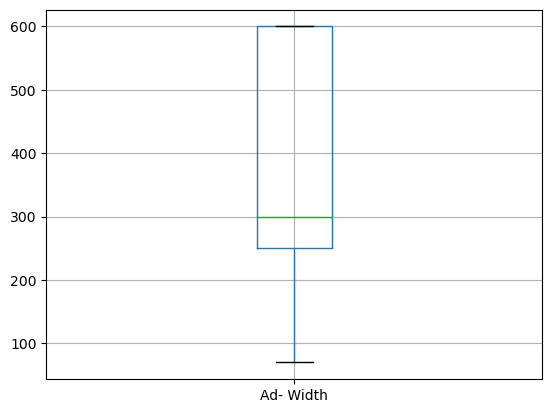

The description statistics for Ad Size column is: 


count     23066.000000
mean      96674.468048
std       61538.329557
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64


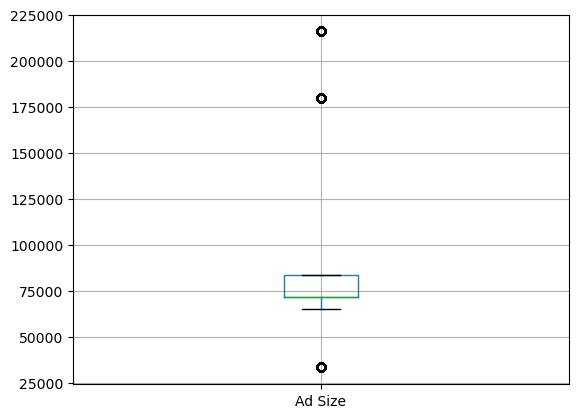

The description statistics for Available_Impressions column is: 


count    2.306600e+04
mean     2.432044e+06
std      4.742888e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      2.759286e+07
Name: Available_Impressions, dtype: float64


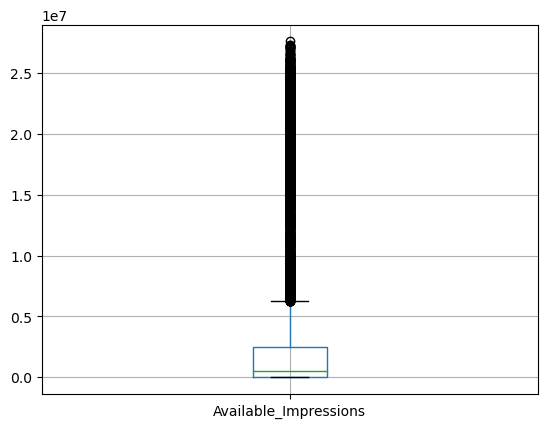

The description statistics for Matched_Queries column is: 


count    2.306600e+04
mean     1.295099e+06
std      2.512970e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      1.470202e+07
Name: Matched_Queries, dtype: float64


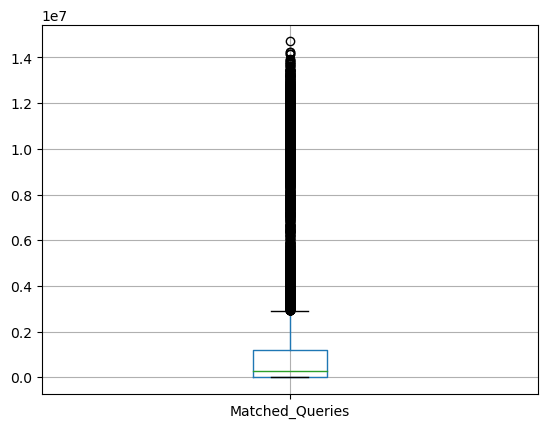

The description statistics for Impressions column is: 


count    2.306600e+04
mean     1.241520e+06
std      2.429400e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      1.419477e+07
Name: Impressions, dtype: float64


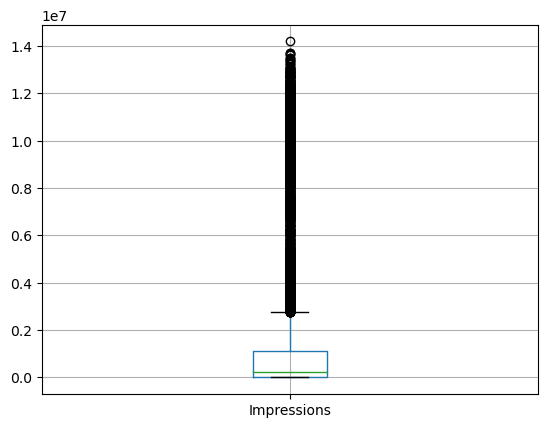

The description statistics for Clicks column is: 


count     23066.000000
mean      10678.518816
std       17353.409363
min           1.000000
25%         710.000000
50%        4425.000000
75%       12793.750000
max      143049.000000
Name: Clicks, dtype: float64


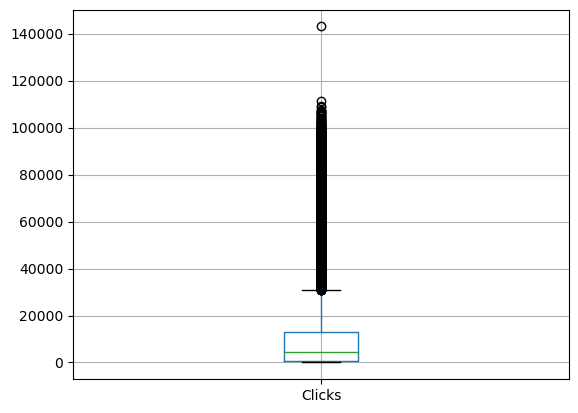

The description statistics for Spend column is: 


count    23066.000000
mean      2706.625689
std       4067.927273
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max      26931.870000
Name: Spend, dtype: float64


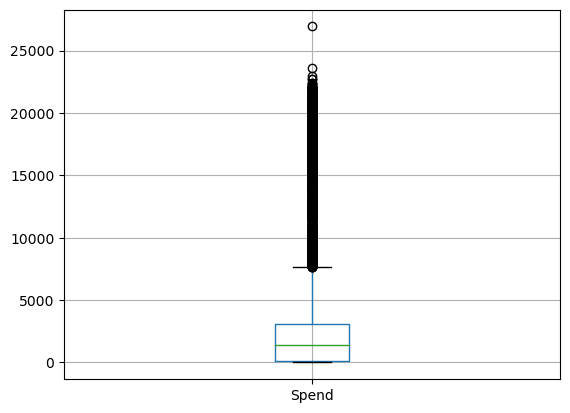

The description statistics for Fee column is: 


count    23066.000000
mean         0.335123
std          0.031963
min          0.210000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64


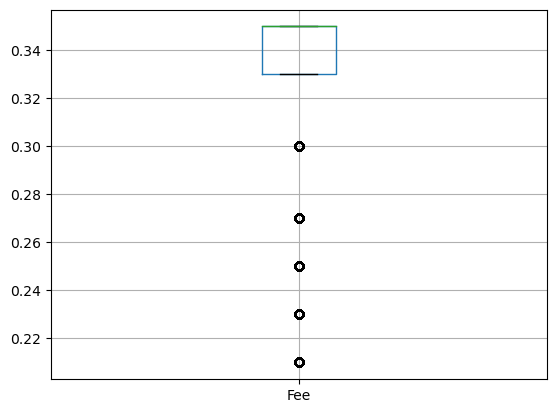

The description statistics for Revenue column is: 


count    23066.000000
mean      1924.252331
std       3105.238410
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max      21276.180000
Name: Revenue, dtype: float64


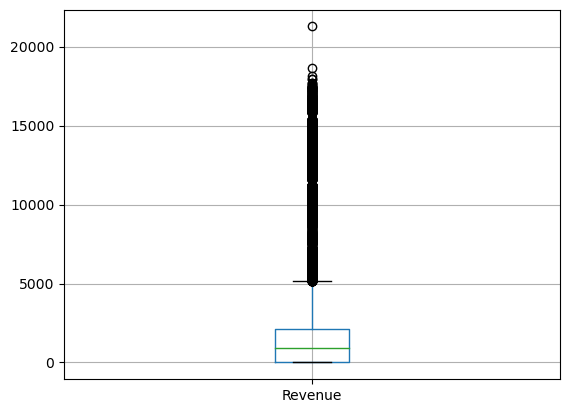

The description statistics for CTR column is: 


count    23066.000000
mean         8.409941
std          9.262048
min          0.010874
25%          0.265107
50%          9.391248
75%         13.470571
max        200.000000
Name: CTR, dtype: float64


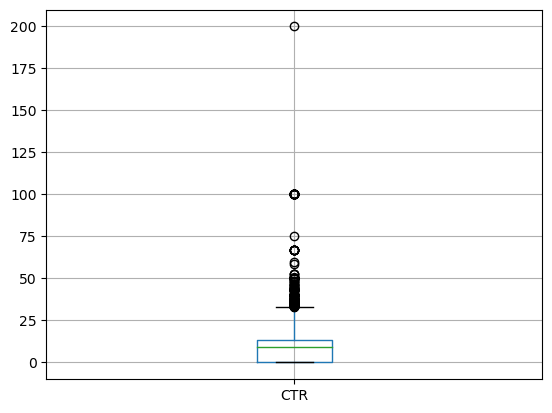

The description statistics for CPM column is: 


count    23066.000000
mean         8.396849
std          9.057760
min          0.000000
25%          1.749084
50%          8.371566
75%         13.042018
max        715.000000
Name: CPM, dtype: float64


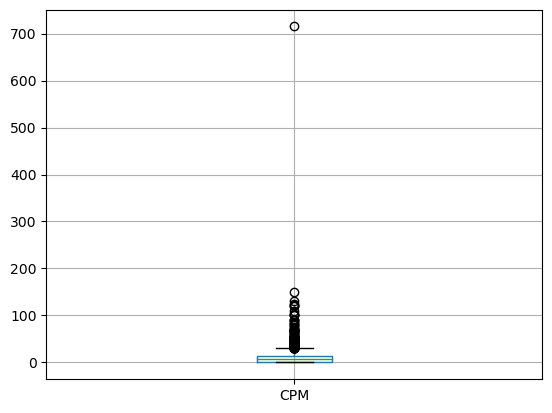

The description statistics for CPC column is: 


count    23066.000000
mean         0.336678
std          0.341253
min          0.000000
25%          0.089736
50%          0.139347
75%          0.546242
max          7.264000
Name: CPC, dtype: float64


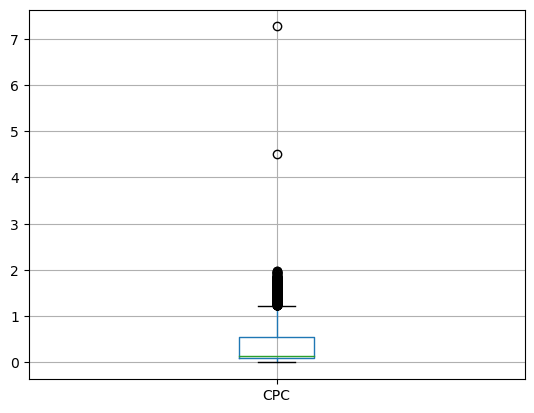

In [39]:
for i in range(0,13):
    print(f"The description statistics for {num_cols[i]} column is: " )
    print('\n')
    print(df_num[num_cols[i]].describe())
    df_num.boxplot(column=num_cols[i])
    plt.show()

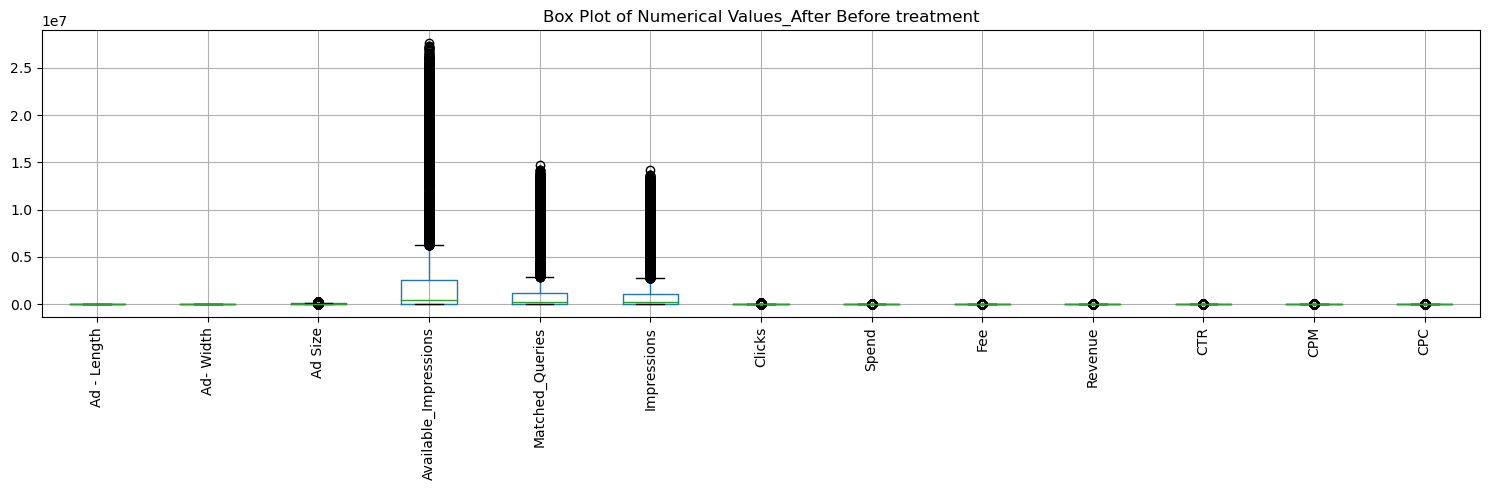

In [40]:
df_num.boxplot(figsize=(15,5))
plt.xticks(rotation = 90)
plt.title('Box Plot of Numerical Values_After Before treatment')
plt.tight_layout()
plt.savefig('before_outlier.jpg')
plt.show()
plt.show()

In [41]:

def detect_outliers(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=[float, int]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outlier_count = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
        if outlier_count > 0:
            outlier_counts[column] = outlier_count
    
    return outlier_counts


outliers = detect_outliers(df)
print(outliers)


{'Ad Size': 8448, 'Available_Impressions': 2378, 'Matched_Queries': 3192, 'Impressions': 3269, 'Clicks': 1691, 'Spend': 2081, 'Fee': 3517, 'Revenue': 2325, 'CTR': 275, 'CPM': 207, 'CPC': 585}


In [42]:
def Outliers(col):
    q5, q25 , q75, q95 = df[col].quantile([0.05, 0.25, 0.75, 0.95])
    iqr = q75 - q25
    lw = q25 - 1.5* (iqr)
    uw = q75 + 1.5* (iqr)
    return (lw, uw, q5, q95)


In [43]:
for i in df_num.columns:
    lw, uw, q5, q95 = Outliers(i)
    df[i] = np.where(df[i] < lw, q5, df[i])
    df[i] = np.where(df[i] > uw, q95, df[i])

In [44]:
df_num = df.select_dtypes(include=['int64', 'float64'])

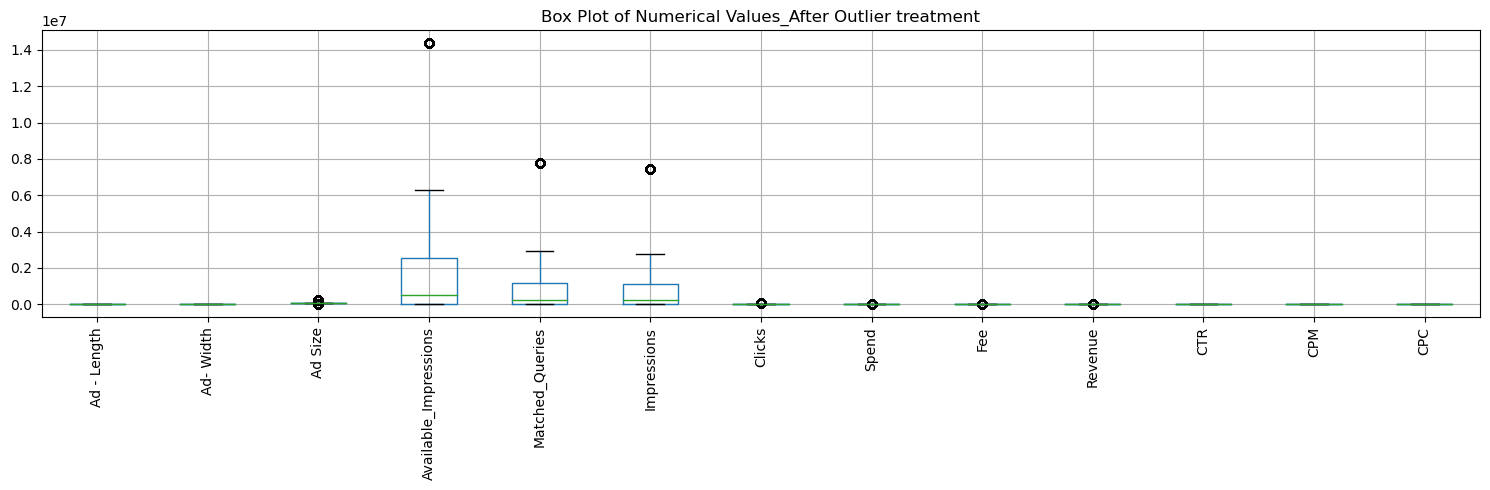

In [45]:
df_num.boxplot(figsize=(15,5))
plt.xticks(rotation = 90)
plt.title('Box Plot of Numerical Values_After Outlier treatment')
plt.tight_layout()
plt.savefig('after_outlier.jpg')
plt.show()

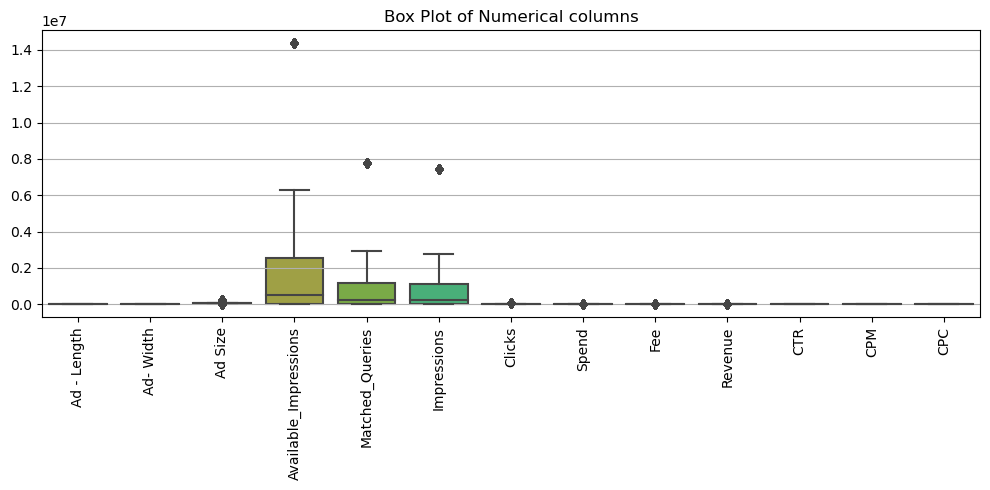

In [46]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.xticks(rotation = 90)
sns.boxplot(data=df_num)
plt.title('Box Plot of Numerical columns')
plt.tight_layout()
plt.savefig('box_plot_after.jpg')
plt.show()

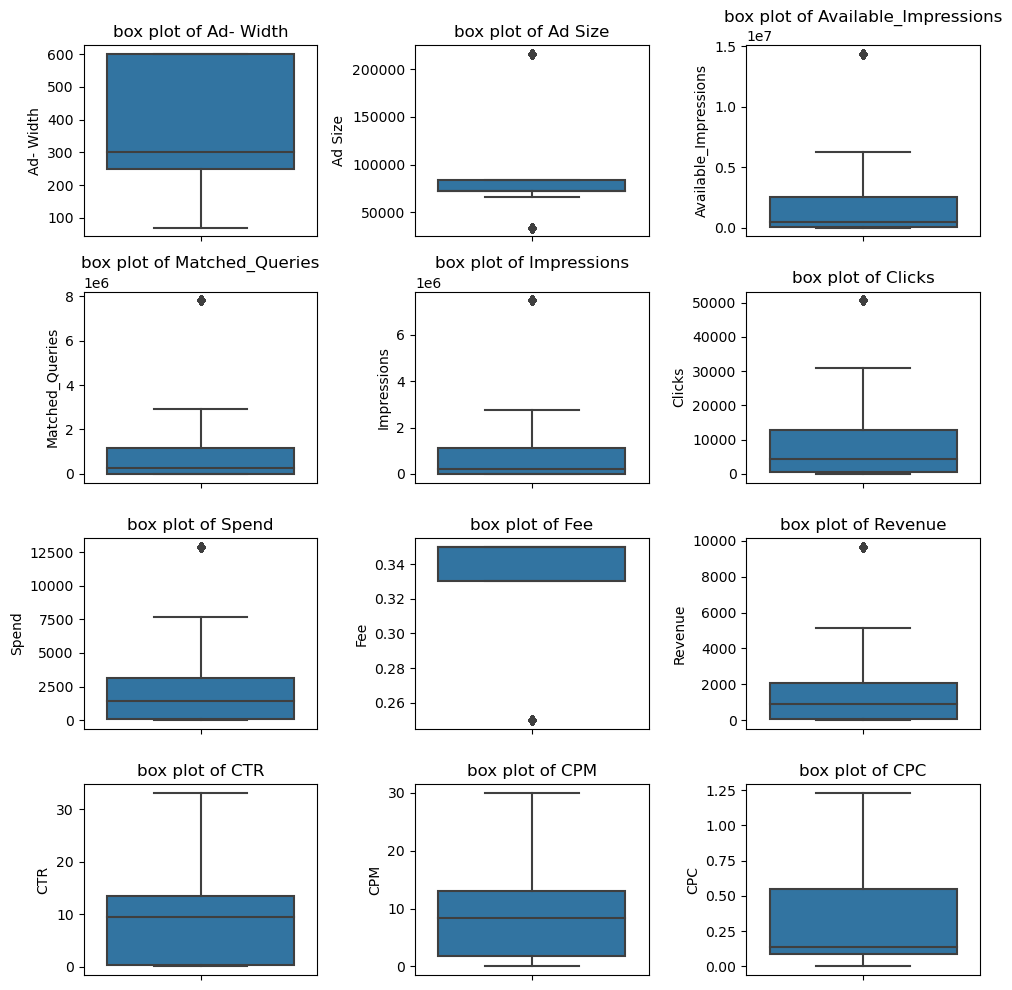

In [47]:
plt.figure(figsize=(10,10))
num_cols = df_num.columns
for i in range(1, len(num_cols)):
    plt.subplot(4, 3, i)
    sns.boxplot(data= df_num, y = df_num[num_cols[i]])
    plt.title(f'box plot of {num_cols[i]}')
    plt.tight_layout()

The description statistics for Ad - Length column is: 


count    23066.000000
mean       385.163097
std        233.651434
min        120.000000
25%        120.000000
50%        300.000000
75%        720.000000
max        728.000000
Name: Ad - Length, dtype: float64


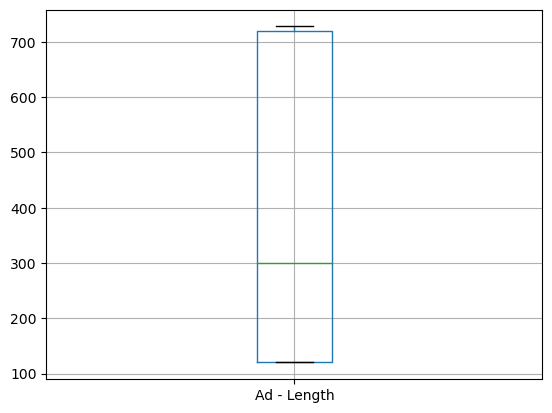

The description statistics for Ad- Width column is: 


count    23066.000000
mean       337.896037
std        203.092885
min         70.000000
25%        250.000000
50%        300.000000
75%        600.000000
max        600.000000
Name: Ad- Width, dtype: float64


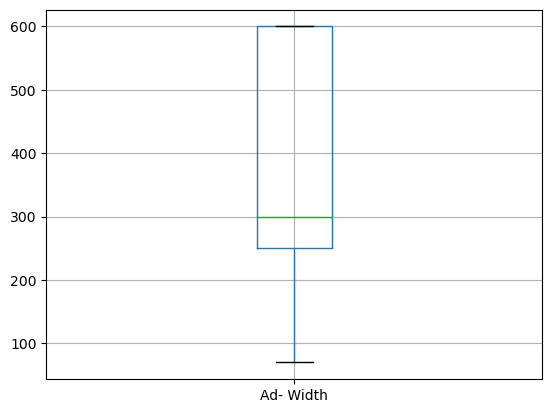

The description statistics for Ad Size column is: 


count     23066.000000
mean      97702.994884
std       63200.863805
min       33600.000000
25%       72000.000000
50%       72000.000000
75%       84000.000000
max      216000.000000
Name: Ad Size, dtype: float64


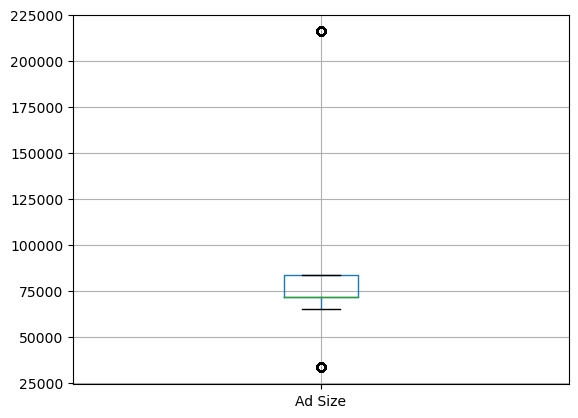

The description statistics for Available_Impressions column is: 


count    2.306600e+04
mean     2.441825e+06
std      4.284704e+06
min      1.000000e+00
25%      3.367225e+04
50%      4.837710e+05
75%      2.527712e+06
max      1.436391e+07
Name: Available_Impressions, dtype: float64


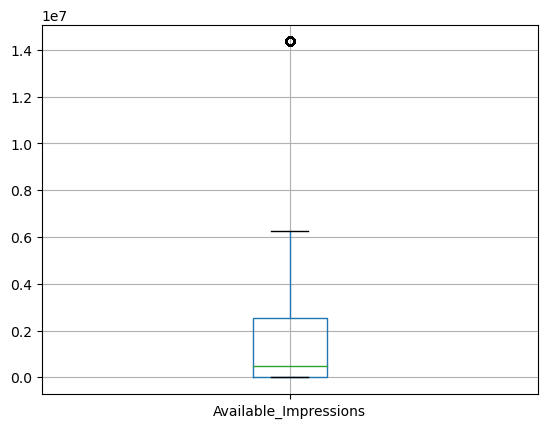

The description statistics for Matched_Queries column is: 


count    2.306600e+04
mean     1.474738e+06
std      2.600154e+06
min      1.000000e+00
25%      1.828250e+04
50%      2.580875e+05
75%      1.180700e+06
max      7.803449e+06
Name: Matched_Queries, dtype: float64


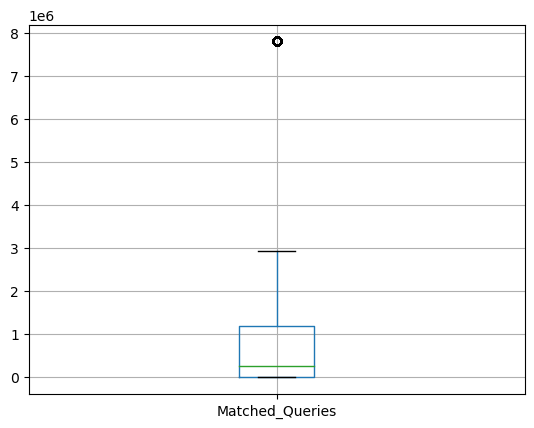

The description statistics for Impressions column is: 


count    2.306600e+04
mean     1.420322e+06
std      2.518037e+06
min      1.000000e+00
25%      7.990500e+03
50%      2.252900e+05
75%      1.112428e+06
max      7.473380e+06
Name: Impressions, dtype: float64


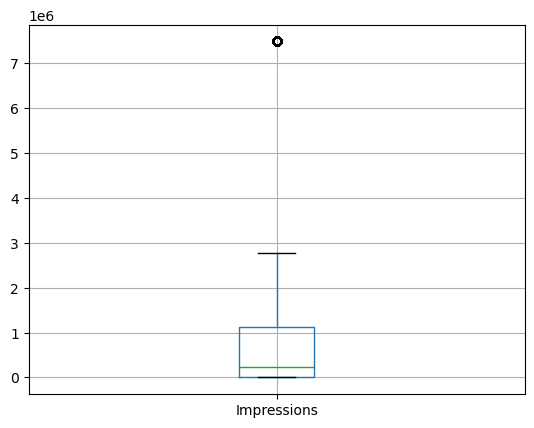

The description statistics for Clicks column is: 


count    23066.000000
mean      9754.187029
std      13550.540215
min          1.000000
25%        710.000000
50%       4425.000000
75%      12793.750000
max      50662.000000
Name: Clicks, dtype: float64


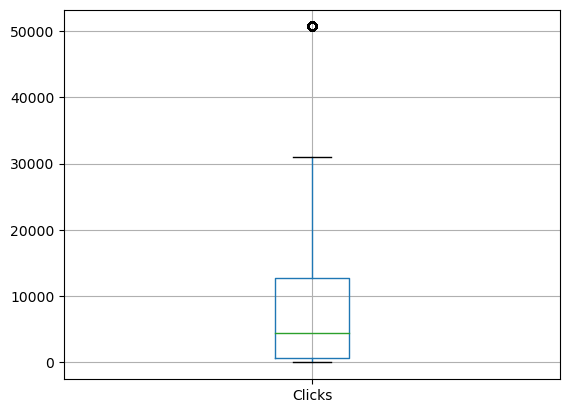

The description statistics for Spend column is: 


count    23066.000000
mean      2637.369247
std       3649.025333
min          0.000000
25%         85.180000
50%       1425.125000
75%       3121.400000
max      12899.765000
Name: Spend, dtype: float64


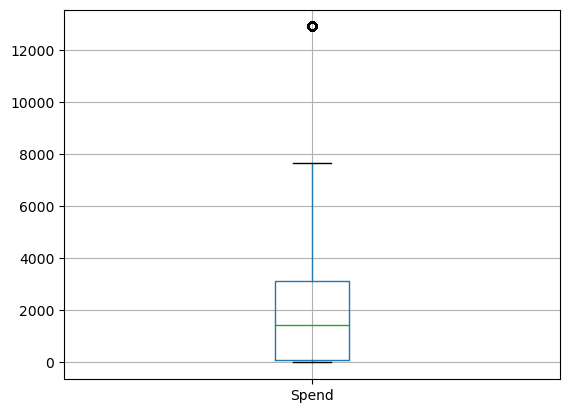

The description statistics for Fee column is: 


count    23066.000000
mean         0.332665
std          0.035582
min          0.250000
25%          0.330000
50%          0.350000
75%          0.350000
max          0.350000
Name: Fee, dtype: float64


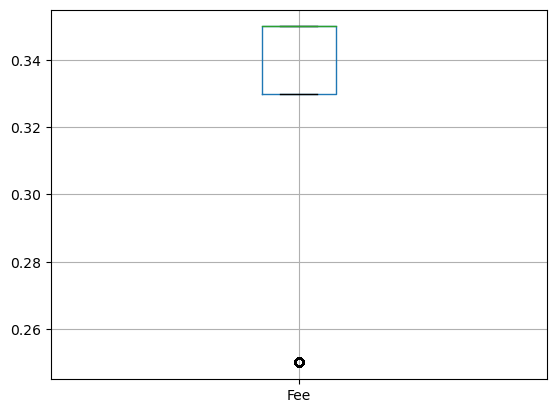

The description statistics for Revenue column is: 


count    23066.000000
mean      1905.954594
std       2819.027143
min          0.000000
25%         55.365375
50%        926.335000
75%       2091.338150
max       9674.825000
Name: Revenue, dtype: float64


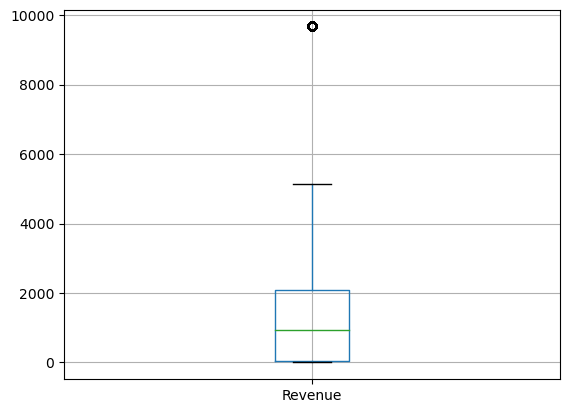

The description statistics for CTR column is: 


count    23066.000000
mean         8.109982
std          7.969265
min          0.010874
25%          0.265107
50%          9.391248
75%         13.470571
max         33.082707
Name: CTR, dtype: float64


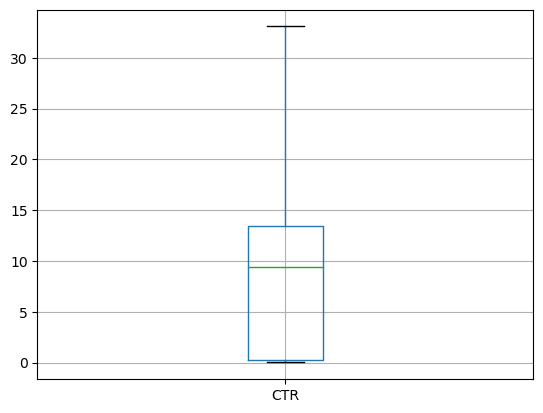

The description statistics for CPM column is: 


count    23066.000000
mean         8.133005
std          6.664651
min          0.000000
25%          1.749084
50%          8.371566
75%         13.042018
max         29.978693
Name: CPM, dtype: float64


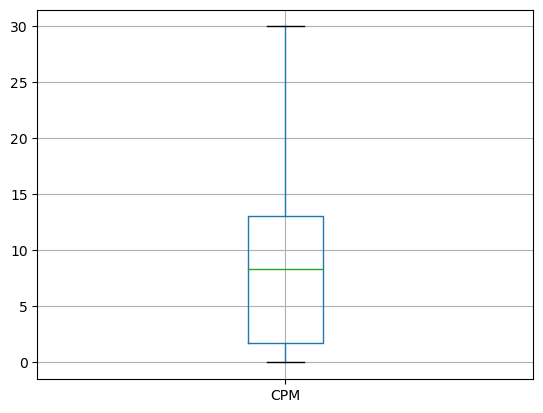

The description statistics for CPC column is: 


count    23066.000000
mean         0.322286
std          0.297590
min          0.000000
25%          0.089736
50%          0.139347
75%          0.546242
max          1.229356
Name: CPC, dtype: float64


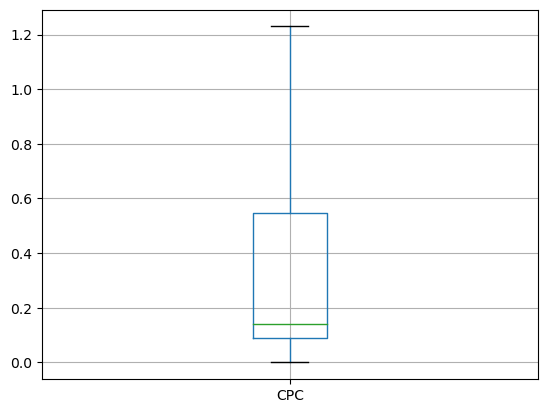

In [48]:
for i in range(0,13):
    print(f"The description statistics for {num_cols[i]} column is: " )
    print('\n')
    print(df_num[num_cols[i]].describe())
    df.boxplot(column=num_cols[i])
    plt.show()

***Outliers are Treated***

#### Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()

In [52]:
#from scipy.stats import zscore
#df_num_scaled_Zscore = df_num.apply(zscore)

In [53]:
scaled_df = X.fit_transform(df_num)

In [54]:
scaled_df

array([[-0.3644957 , -0.43279676, -0.35922748, ..., -0.9788297 ,
        -1.22034614, -1.08301093],
       [-0.3644957 , -0.43279676, -0.35922748, ..., -0.97364973,
        -1.22034614, -1.08301093],
       [-0.3644957 , -0.43279676, -0.35922748, ..., -0.98233165,
        -1.22034614, -1.08301093],
       ...,
       [ 1.43309269, -0.18659865,  1.87180305, ...,  1.96662486,
         1.8374699 , -0.91499073],
       [-1.13489073,  1.29058999, -0.40669621, ...,  1.96662486,
         1.8374699 , -0.84778264],
       [ 1.43309269, -0.18659865,  1.87180305, ...,  1.96662486,
         1.8374699 , -0.78057456]])

In [55]:
df100 = pd.DataFrame(X.fit_transform(df_num), columns=df_num.columns)

In [56]:
df100.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.364496,-0.432797,-0.359227,-0.569484,-0.567061,-0.563943,-0.719779,-0.722776,0.487214,-0.676118,-0.978830,-1.220346,-1.083011
1,-0.364496,-0.432797,-0.359227,-0.569490,-0.567076,-0.563958,-0.719779,-0.722776,0.487214,-0.676118,-0.973650,-1.220346,-1.083011
2,-0.364496,-0.432797,-0.359227,-0.569269,-0.567049,-0.563931,-0.719779,-0.722776,0.487214,-0.676118,-0.982332,-1.220346,-1.083011
3,-0.364496,-0.432797,-0.359227,-0.569339,-0.566994,-0.563875,-0.719779,-0.722776,0.487214,-0.676118,-0.992329,-1.220346,-1.083011
4,-0.364496,-0.432797,-0.359227,-0.569622,-0.567093,-0.563975,-0.719779,-0.722776,0.487214,-0.676118,-0.965826,-1.220346,-1.083011


In [57]:
df100.shape

(23066, 13)

In [58]:
df100.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,23066.0,1.281478e-16,1.000022,-1.134891,-1.134891,-0.364496,1.433093,1.467332
Ad- Width,23066.0,-1.182903e-16,1.000022,-1.319110,-0.432797,-0.186599,1.290590,1.290590
Ad Size,23066.0,-6.900268e-17,1.000022,-1.014296,-0.406696,-0.406696,-0.216821,1.871803
Available_Impressions,23066.0,3.943010e-17,1.000022,-0.569906,-0.562047,-0.456997,0.020045,2.782537
Matched_Queries,23066.0,-1.971505e-17,1.000022,-0.567185,-0.560154,-0.467925,-0.113087,2.434028
Impressions,23066.0,0.000000e+00,1.000022,-0.564071,-0.560898,-0.474599,-0.122278,2.403932
Clicks,23066.0,1.971505e-17,1.000022,-0.719779,-0.667456,-0.393291,0.224318,3.018972
Spend,23066.0,-2.365806e-16,1.000022,-0.722776,-0.699432,-0.332218,0.132649,2.812427
Fee,23066.0,1.143473e-15,1.000022,-2.323289,-0.074887,0.487214,0.487214,0.487214
Revenue,23066.0,3.943010e-17,1.000022,-0.676118,-0.656478,-0.347510,0.065763,2.755929


#### Hirerachical Clustering

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [61]:
wardlink = linkage(scaled_df, method = 'ward', metric='euclidean')

In [62]:
#%timeit dend = dendrogram(wardlink)

In [63]:
#dend = dendrogram(wardlink)

Duration: 0.35003018379211426 seconds


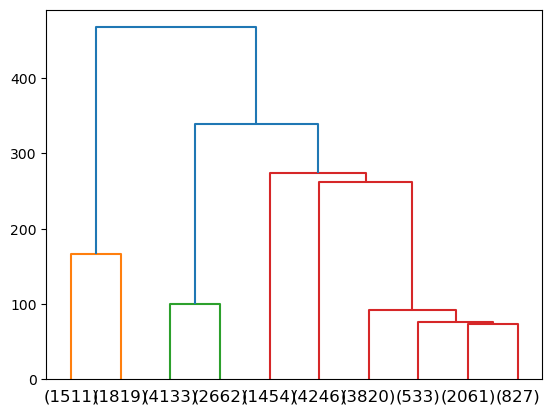

In [64]:
import time

start_time = time.time()

dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

end_time = time.time()
duration = end_time - start_time
print("Duration:", duration, "seconds")

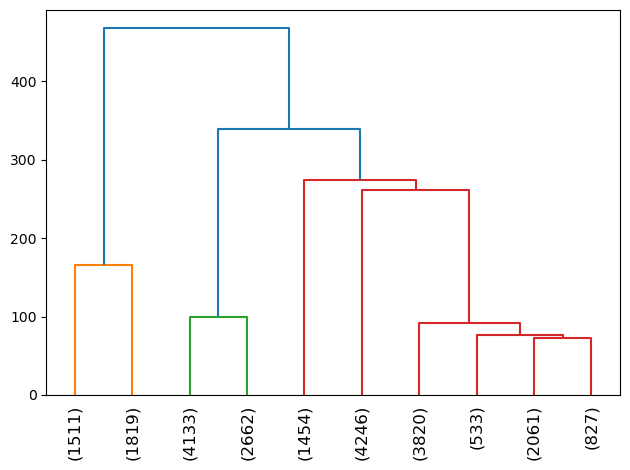

In [65]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

plt.xticks(rotation =90)
plt.tight_layout()
plt.savefig('dend.jpg')

In [66]:
wardlink_unscaled = linkage(df_num, method = 'ward', metric='euclidean')

Duration: 0.13566184043884277 seconds


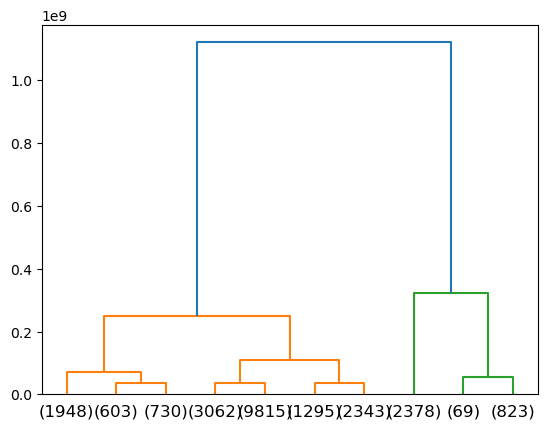

In [67]:
import time

start_time = time.time()

dend = dendrogram(wardlink_unscaled,
                 truncate_mode='lastp',
                 p = 10,
                 )

end_time = time.time()
duration = end_time - start_time
print("Duration:", duration, "seconds")

In [68]:
from scipy.cluster.hierarchy import fcluster

In [69]:
clusters = fcluster(wardlink, 5, criterion='maxclust')
clusters

array([2, 2, 2, ..., 4, 5, 4], dtype=int32)

In [70]:
dfH = df.copy() 
dfK = df.copy()

In [71]:
dfH.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-09-02 17:00:00,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,1806.0,325.0,323.0,1.0,0.0,0.35,0.0,0.309598,0.0,0.0
1,2020-09-02 10:00:00,Format1,300.0,250.0,75000.0,Inter227,App,Mobile,Video,1780.0,285.0,285.0,1.0,0.0,0.35,0.0,0.350877,0.0,0.0
2,2020-09-01 22:00:00,Format1,300.0,250.0,75000.0,Inter222,Video,Desktop,Display,2727.0,356.0,355.0,1.0,0.0,0.35,0.0,0.281690,0.0,0.0
3,2020-09-03 20:00:00,Format1,300.0,250.0,75000.0,Inter228,Video,Mobile,Video,2430.0,497.0,495.0,1.0,0.0,0.35,0.0,0.202020,0.0,0.0
4,2020-09-04 15:00:00,Format1,300.0,250.0,75000.0,Inter217,Web,Desktop,Video,1218.0,242.0,242.0,1.0,0.0,0.35,0.0,0.413223,0.0,0.0


In [72]:
dfH['Clusters'] = clusters

In [73]:
dfH.Clusters.value_counts()

Clusters
5    7241
2    6795
4    4246
1    3330
3    1454
Name: count, dtype: int64

In [74]:
dfH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Timestamp              23066 non-null  datetime64[ns]
 1   InventoryType          23066 non-null  object        
 2   Ad - Length            23066 non-null  float64       
 3   Ad- Width              23066 non-null  float64       
 4   Ad Size                23066 non-null  float64       
 5   Ad Type                23066 non-null  object        
 6   Platform               23066 non-null  object        
 7   Device Type            23066 non-null  object        
 8   Format                 23066 non-null  object        
 9   Available_Impressions  23066 non-null  float64       
 10  Matched_Queries        23066 non-null  float64       
 11  Impressions            23066 non-null  float64       
 12  Clicks                 23066 non-null  float64       
 13  S

In [75]:
dfH.columns

Index(['Timestamp', 'InventoryType', 'Ad - Length', 'Ad- Width', 'Ad Size',
       'Ad Type', 'Platform', 'Device Type', 'Format', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC', 'Clusters'],
      dtype='object')

In [76]:
Aggdata =dfH.drop(["Timestamp","InventoryType", 'Ad Type', 'Platform', 'Device Type', 'Format'],axis=1).groupby('Clusters').agg('mean')
Aggdata['Freq']=dfH.Clusters.value_counts().sort_index()
Aggdata['Freq']

Clusters
1    3330
2    6795
3    1454
4    4246
5    7241
Name: Freq, dtype: int64

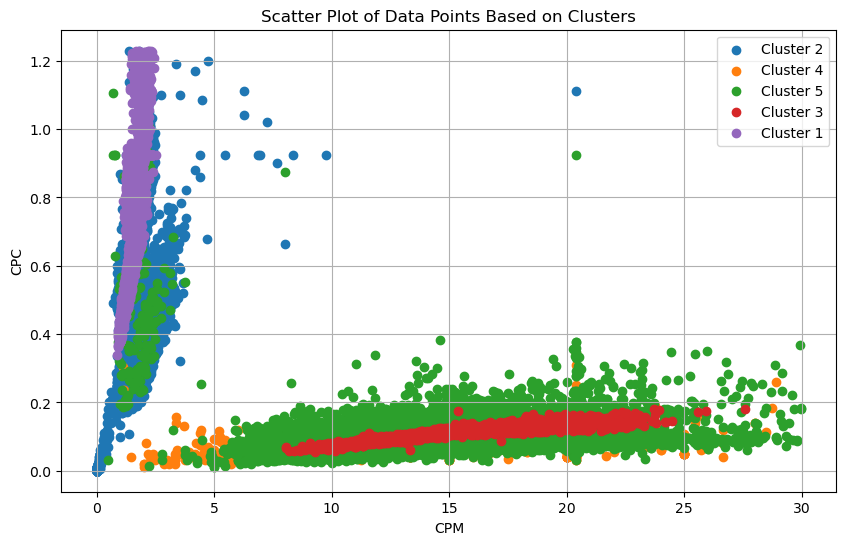

In [77]:
plt.figure(figsize=(10, 6))
for cluster in dfH['Clusters'].unique():
    cluster_data = dfH[dfH['Clusters'] == cluster]
    plt.scatter(x = cluster_data['CPM'], y = cluster_data['CPC'], label=f'Cluster {cluster}')

plt.title('Scatter Plot of Data Points Based on Clusters')
plt.xlabel('CPM')
plt.ylabel('CPC')
plt.legend()
plt.grid(True)
plt.show()


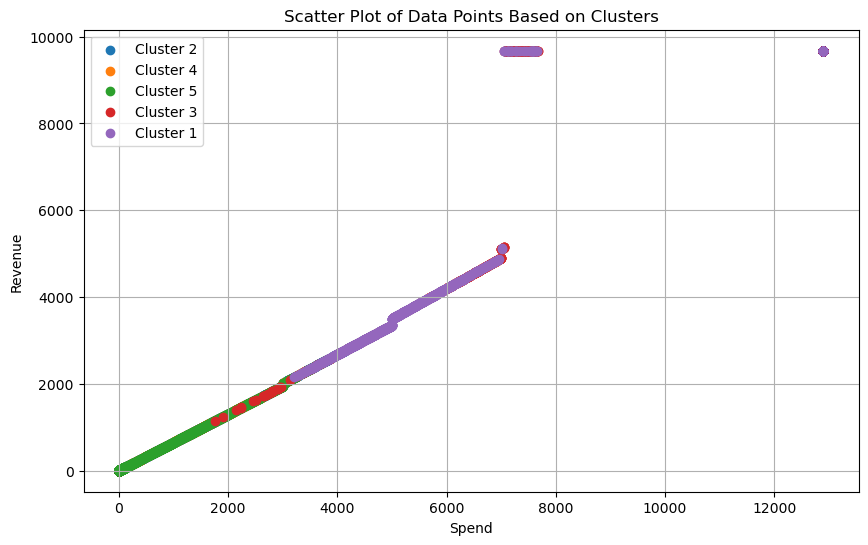

In [78]:
plt.figure(figsize=(10, 6))
for cluster in dfH['Clusters'].unique():
    cluster_data = dfH[dfH['Clusters'] == cluster]
    plt.scatter(x = cluster_data['Spend'], y = cluster_data['Revenue'], label=f'Cluster {cluster}')

plt.title('Scatter Plot of Data Points Based on Clusters')
plt.xlabel('Spend')
plt.ylabel('Revenue')
plt.legend()
plt.grid(True)
plt.show()


#### K Means Clustering

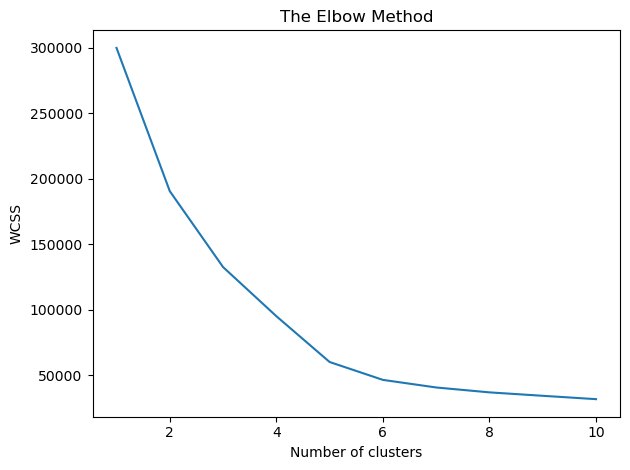

In [80]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.tight_layout()
plt.savefig('elbow.jpg')
plt.show()

In [81]:
from sklearn.metrics import silhouette_samples, silhouette_score

For n_clusters=2, the silhouette score is 0.4736752275525655
For n_clusters=3, the silhouette score is 0.3913585278994494
For n_clusters=4, the silhouette score is 0.45214051606551087
For n_clusters=5, the silhouette score is 0.5565910209040732
For n_clusters=6, the silhouette score is 0.5752600558591118
For n_clusters=7, the silhouette score is 0.5353622394766712
For n_clusters=8, the silhouette score is 0.46278632100007316
For n_clusters=9, the silhouette score is 0.4583701408304264
For n_clusters=10, the silhouette score is 0.41347262437489124


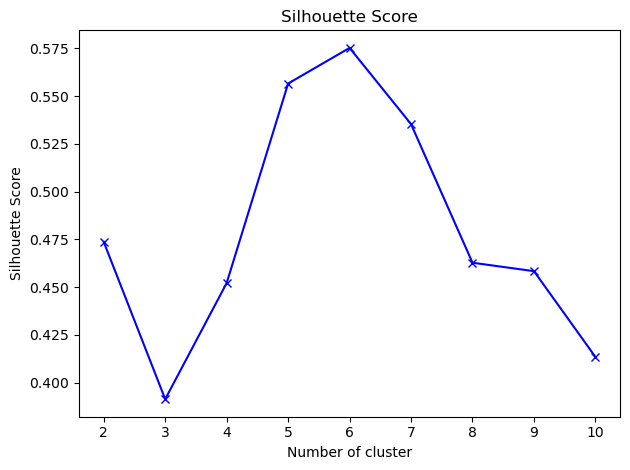

In [82]:
x = {}
range_n_clusters=[2,3,4,5,6,7,8,9,10]
for num_clusters in range_n_clusters:
    
    # initialize K means
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    cluster_labels=kmeans.labels_
    #Silhouette Score
    silhouette_avg = silhouette_score(scaled_df,cluster_labels)
    x[num_clusters] = silhouette_avg
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
plt.figure()
plt.plot(list(x.keys()), list(x.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.title('Silhouette Score')
plt.tight_layout()
plt.savefig('silhouette_score.jpg')
plt.show()
     

In [83]:
pd.DataFrame(list(x.items()),columns = ['Num_Clusters','Silhouette Score'])

,Num_Clusters,Silhouette Score
0,2,0.473675
1,3,0.391359
2,4,0.452141
3,5,0.556591
4,6,0.575260
5,7,0.535362
6,8,0.462786
7,9,0.458370
8,10,0.413473


In [84]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df)
labels = k_means.labels_
print(silhouette_score(scaled_df,labels))


0.5752600558591118


In [85]:
sil_width = silhouette_samples(scaled_df,labels)

In [86]:
dfK['Clusters'] = labels

In [87]:
dfK.Clusters.value_counts()

Clusters
0    6994
1    6842
3    4514
2    1756
4    1527
5    1433
Name: count, dtype: int64

In [88]:
Aggdata_Kmeans =dfK.drop(["Timestamp","InventoryType", 'Ad Type', 'Platform', 'Device Type', 'Format'],axis=1).groupby('Clusters').agg('mean')
Aggdata_Kmeans['Freq']=dfK.Clusters.value_counts().sort_index()
Aggdata_Kmeans.iloc[:, [0,1,2,3,4,5,-1]]

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Freq
Clusters,,,,,,,
0,418.072634,157.144695,57160.817844,2.070385e+06,1.020575e+06,9.809877e+05,6994
1,149.554516,558.206665,76442.560655,4.658225e+04,2.866160e+04,2.125739e+04,6842
2,316.280182,254.538724,79328.337130,9.789532e+06,7.547121e+06,7.435034e+06,1756
3,695.167922,316.803279,215619.849358,2.790594e+05,1.476652e+05,1.267586e+05,4514
4,680.940406,117.924034,71102.789784,1.431922e+07,7.803449e+06,7.473380e+06,1527
5,142.182833,571.179344,76505.233775,8.434057e+05,5.911566e+05,4.987601e+05,1433


In [89]:
Aggdata_Kmeans.iloc[:, 6:]

,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Freq
Clusters,,,,,,,,
0,3451.112382,1763.331324,0.346617,1157.976570,0.392435,1.794809,0.538987,6994
1,2947.786466,318.920140,0.349670,208.483293,15.520076,14.191189,0.101735,6842
2,8548.277904,4867.490575,0.298565,3334.230211,0.236940,1.377662,0.583717,1756
3,14758.002437,1224.160505,0.349548,797.231842,12.782331,11.352640,0.094341,4514
4,17394.944335,12708.127967,0.250000,9608.073495,0.187388,1.707285,0.890525,1527
5,50588.809491,8960.420656,0.260063,7196.285301,13.768415,15.125511,0.109844,1433


In [90]:
Aggdata_Kmeans['Revenue/spend'] = Aggdata_Kmeans['Revenue'] / Aggdata_Kmeans['Spend']

In [91]:
Aggdata_Kmeans['Ad_lenght_wdith_ratio'] = Aggdata_Kmeans['Ad - Length'] / Aggdata_Kmeans['Ad- Width']

In [92]:
revenue_sum = Aggdata_Kmeans.Revenue.sum()
cluster0_rev = Aggdata_Kmeans.iloc[0].Revenue
cluster1_rev = Aggdata_Kmeans.iloc[1].Revenue
cluster2_rev = Aggdata_Kmeans.iloc[2].Revenue
cluster3_rev = Aggdata_Kmeans.iloc[3].Revenue
cluster4_rev = Aggdata_Kmeans.iloc[4].Revenue
cluster5_rev = Aggdata_Kmeans.iloc[5].Revenue
revenue_sum

22302.280711726617

In [93]:
print(f'Avg Ad Size {Aggdata_Kmeans.loc[0,"Ad Size"]} with avg CTR {Aggdata_Kmeans.loc[0,"CTR"]},with avg CPC {Aggdata_Kmeans.loc[0,"CPC"]}, with avg CPM {Aggdata_Kmeans.loc[0,"CPM"]}, cluster0 percentage revenue {cluster0_rev/revenue_sum *100}%')
print(f'Avg Ad Size {Aggdata_Kmeans.loc[1,"Ad Size"]} with avg CTR {Aggdata_Kmeans.loc[1,"CTR"]},with avg CPC {Aggdata_Kmeans.loc[1,"CPC"]}, with avg CPM {Aggdata_Kmeans.loc[1,"CPM"]}, cluster1 percentage revenue {cluster1_rev/revenue_sum *100}%')
print(f'Avg Ad Size {Aggdata_Kmeans.loc[2,"Ad Size"]} with avg CTR {Aggdata_Kmeans.loc[2,"CTR"]},with avg CPC {Aggdata_Kmeans.loc[2,"CPC"]}, with avg CPM {Aggdata_Kmeans.loc[2,"CPM"]}, cluster2 percentage revenue {cluster2_rev/revenue_sum *100}%')
print(f'Avg Ad Size {Aggdata_Kmeans.loc[3,"Ad Size"]} with avg CTR {Aggdata_Kmeans.loc[3,"CTR"]},with avg CPC {Aggdata_Kmeans.loc[3,"CPC"]}, with avg CPM {Aggdata_Kmeans.loc[3,"CPM"]}, cluster3 percentage revenue {cluster3_rev/revenue_sum *100}%')
print(f'Avg Ad Size {Aggdata_Kmeans.loc[4,"Ad Size"]} with avg CTR {Aggdata_Kmeans.loc[4,"CTR"]},with avg CPC {Aggdata_Kmeans.loc[4,"CPC"]}, with avg CPM {Aggdata_Kmeans.loc[4,"CPM"]}, cluster4 percentage revenue {cluster4_rev/revenue_sum *100}%')
print(f'Avg Ad Size {Aggdata_Kmeans.loc[5,"Ad Size"]} with avg CTR {Aggdata_Kmeans.loc[5,"CTR"]},with avg CPC {Aggdata_Kmeans.loc[5,"CPC"]}, with avg CPM {Aggdata_Kmeans.loc[5,"CPM"]}, cluster5 percentage revenue {cluster5_rev/revenue_sum *100}%')

Avg Ad Size 57160.81784386617 with avg CTR 0.39243522928154273,with avg CPC 0.5389874528999932, with avg CPM 1.794809287816378, cluster0 percentage revenue 5.192189018496631%
Avg Ad Size 76442.5606547793 with avg CTR 15.52007632563939,with avg CPC 0.10173497818805634, with avg CPM 14.191189076122065, cluster1 percentage revenue 0.9348070528649953%
Avg Ad Size 79328.33712984054 with avg CTR 0.23693995746652569,with avg CPC 0.5837172383234134, with avg CPM 1.377662088933408, cluster2 percentage revenue 14.950175965169576%
Avg Ad Size 215619.84935755428 with avg CTR 12.78233131585637,with avg CPC 0.09434064594678342, with avg CPM 11.352639904576556, cluster3 percentage revenue 3.5746650859852096%
Avg Ad Size 71102.78978388998 with avg CTR 0.18738790566346972,with avg CPC 0.8905246253097051, with avg CPM 1.7072853617197503, cluster4 percentage revenue 43.08112528615268%
Avg Ad Size 76505.23377529658 with avg CTR 13.768414923902684,with avg CPC 0.1098436416436345, with avg CPM 15.1255114222

In [94]:
spend_sum = Aggdata_Kmeans.Spend.sum()
cluster0_spend = Aggdata_Kmeans.iloc[0].Spend
cluster1_spend = Aggdata_Kmeans.iloc[1].Spend
cluster2_spend = Aggdata_Kmeans.iloc[2].Spend
cluster3_spend = Aggdata_Kmeans.iloc[3].Spend
cluster4_spend = Aggdata_Kmeans.iloc[4].Spend
cluster5_spend = Aggdata_Kmeans.iloc[5].Spend
spend_sum

29842.451167135627

In [95]:
print(f'Avg Ad Size {Aggdata_Kmeans.loc[0,"Ad Size"]} with avg CTR {Aggdata_Kmeans.loc[0,"CTR"]},with avg CPC {Aggdata_Kmeans.loc[0,"CPC"]}, with avg CPM {Aggdata_Kmeans.loc[0,"CPM"]}, cluster0 percentage spend {cluster0_spend/spend_sum *100}%, cluster0 percentage revenue {cluster0_rev/revenue_sum *100}%')
print(f'Avg Ad Size {Aggdata_Kmeans.loc[1,"Ad Size"]} with avg CTR {Aggdata_Kmeans.loc[1,"CTR"]},with avg CPC {Aggdata_Kmeans.loc[1,"CPC"]}, with avg CPM {Aggdata_Kmeans.loc[1,"CPM"]}, cluster1 percentage spend {cluster1_spend/spend_sum *100}%, cluster1 percentage revenue {cluster1_rev/revenue_sum *100}%')
print(f'Avg Ad Size {Aggdata_Kmeans.loc[2,"Ad Size"]} with avg CTR {Aggdata_Kmeans.loc[2,"CTR"]},with avg CPC {Aggdata_Kmeans.loc[2,"CPC"]}, with avg CPM {Aggdata_Kmeans.loc[2,"CPM"]}, cluster2 percentage spend {cluster2_spend/spend_sum *100}%, cluster2 percentage revenue {cluster2_rev/revenue_sum *100}%')
print(f'Avg Ad Size {Aggdata_Kmeans.loc[3,"Ad Size"]} with avg CTR {Aggdata_Kmeans.loc[3,"CTR"]},with avg CPC {Aggdata_Kmeans.loc[3,"CPC"]}, with avg CPM {Aggdata_Kmeans.loc[3,"CPM"]}, cluster3 percentage spend {cluster3_spend/spend_sum *100}%, cluster3 percentage revenue {cluster3_rev/revenue_sum *100}%')
print(f'Avg Ad Size {Aggdata_Kmeans.loc[4,"Ad Size"]} with avg CTR {Aggdata_Kmeans.loc[4,"CTR"]},with avg CPC {Aggdata_Kmeans.loc[4,"CPC"]}, with avg CPM {Aggdata_Kmeans.loc[4,"CPM"]}, cluster4 percentage spend {cluster4_spend/spend_sum *100}%, cluster4 percentage revenue {cluster4_rev/revenue_sum *100}%')
print(f'Avg Ad Size {Aggdata_Kmeans.loc[5,"Ad Size"]} with avg CTR {Aggdata_Kmeans.loc[5,"CTR"]},with avg CPC {Aggdata_Kmeans.loc[5,"CPC"]}, with avg CPM {Aggdata_Kmeans.loc[5,"CPM"]}, cluster5 percentage spend {cluster5_spend/spend_sum *100}%, cluster5 percentage revenue {cluster5_rev/revenue_sum *100}%')

Avg Ad Size 57160.81784386617 with avg CTR 0.39243522928154273,with avg CPC 0.5389874528999932, with avg CPM 1.794809287816378, cluster0 percentage spend 5.908801908114987%, cluster0 percentage revenue 5.192189018496631%
Avg Ad Size 76442.5606547793 with avg CTR 15.52007632563939,with avg CPC 0.10173497818805634, with avg CPM 14.191189076122065, cluster1 percentage spend 1.068679440987293%, cluster1 percentage revenue 0.9348070528649953%
Avg Ad Size 79328.33712984054 with avg CTR 0.23693995746652569,with avg CPC 0.5837172383234134, with avg CPM 1.377662088933408, cluster2 percentage spend 16.310625919801208%, cluster2 percentage revenue 14.950175965169576%
Avg Ad Size 215619.84935755428 with avg CTR 12.78233131585637,with avg CPC 0.09434064594678342, with avg CPM 11.352639904576556, cluster3 percentage spend 4.102077601599232%, cluster3 percentage revenue 3.5746650859852096%
Avg Ad Size 71102.78978388998 with avg CTR 0.18738790566346972,with avg CPC 0.8905246253097051, with avg CPM 1.7

In [96]:
dfK1 = dfK[dfK.Clusters == 0]
dfK2 = dfK[dfK.Clusters == 1]
dfK3 = dfK[dfK.Clusters == 2]
dfK4 = dfK[dfK.Clusters == 3]
dfK5 = dfK[dfK.Clusters == 4]
dfK6 = dfK[dfK.Clusters == 5]


In [97]:
Aggdata_Kmeans

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Freq,Revenue/spend,Ad_lenght_wdith_ratio
Clusters,,,,,,,,,,,,,,,,
0,418.072634,157.144695,57160.817844,2.070385e+06,1.020575e+06,9.809877e+05,3451.112382,1763.331324,0.346617,1157.976570,0.392435,1.794809,0.538987,6994,0.656698,2.660431
1,149.554516,558.206665,76442.560655,4.658225e+04,2.866160e+04,2.125739e+04,2947.786466,318.920140,0.349670,208.483293,15.520076,14.191189,0.101735,6842,0.653716,0.267920
2,316.280182,254.538724,79328.337130,9.789532e+06,7.547121e+06,7.435034e+06,8548.277904,4867.490575,0.298565,3334.230211,0.236940,1.377662,0.583717,1756,0.685000,1.242562
3,695.167922,316.803279,215619.849358,2.790594e+05,1.476652e+05,1.267586e+05,14758.002437,1224.160505,0.349548,797.231842,12.782331,11.352640,0.094341,4514,0.651248,2.194320
4,680.940406,117.924034,71102.789784,1.431922e+07,7.803449e+06,7.473380e+06,17394.944335,12708.127967,0.250000,9608.073495,0.187388,1.707285,0.890525,1527,0.756057,5.774399
5,142.182833,571.179344,76505.233775,8.434057e+05,5.911566e+05,4.987601e+05,50588.809491,8960.420656,0.260063,7196.285301,13.768415,15.125511,0.109844,1433,0.803119,0.248929


In [98]:
dfK1.describe().T

,count,mean,min,25%,50%,75%,max,std
Timestamp,6994,2020-10-13 16:15:47.097511936,2020-09-01 16:00:00,2020-09-22 19:00:00,2020-10-13 11:30:00,2020-11-03 15:00:00,2020-11-24 18:00:00,NaN
Ad - Length,6994.0,418.072634,120.0,300.0,480.0,480.0,728.0,113.243452
Ad- Width,6994.0,157.144695,70.0,70.0,70.0,250.0,600.0,108.107149
Ad Size,6994.0,57160.817844,33600.0,33600.0,33600.0,75000.0,216000.0,31065.628933
Available_Impressions,6994.0,2070385.257077,291.0,1025694.25,2017455.5,2861148.5,6259975.0,1284886.910096
Matched_Queries,6994.0,1020575.036174,43.0,559840.5,933450.5,1391392.75,2886397.0,648636.162333
Impressions,6994.0,980987.724192,36.0,538958.0,882646.0,1336520.5,2766430.0,634246.646998
Clicks,6994.0,3451.112382,1.0,1585.25,3531.0,5083.75,12316.0,2129.689248
Spend,6994.0,1763.331324,0.0,991.9425,1644.665,2429.48,6091.84,1115.06163
Fee,6994.0,0.346617,0.25,0.35,0.35,0.35,0.35,0.010488


In [99]:
dfK2.describe().T

,count,mean,min,25%,50%,75%,max,std
Timestamp,6842,2020-10-14 03:42:08.208126208,2020-09-01 16:00:00,2020-09-23 08:00:00,2020-10-14 03:30:00,2020-11-03 20:00:00,2020-11-24 18:00:00,NaN
Ad - Length,6842.0,149.554516,120.0,120.0,120.0,120.0,336.0,73.318877
Ad- Width,6842.0,558.206665,250.0,600.0,600.0,600.0,600.0,113.50272
Ad Size,6842.0,76442.560655,72000.0,72000.0,72000.0,72000.0,216000.0,20758.388059
Available_Impressions,6842.0,46582.251388,1.0,2777.25,15884.0,46593.5,737804.0,82836.734438
Matched_Queries,6842.0,28661.596755,1.0,1217.25,9120.5,22464.75,375341.0,52156.173404
Impressions,6842.0,21257.389652,1.0,856.25,4044.0,8995.75,315971.0,44396.620201
Clicks,6842.0,2947.786466,1.0,145.0,491.0,1055.75,50662.0,6080.615715
Spend,6842.0,318.92014,0.01,13.1125,51.835,102.1075,4731.74,704.183802
Fee,6842.0,0.34967,0.33,0.35,0.35,0.35,0.35,0.002549


In [100]:
dfK3.describe().T

,count,mean,min,25%,50%,75%,max,std
Timestamp,1756,2020-10-13 22:32:56.309795072,2020-09-01 17:00:00,2020-09-23 09:45:00,2020-10-13 22:00:00,2020-11-03 20:15:00,2020-11-24 18:00:00,NaN
Ad - Length,1756.0,316.280182,300.0,300.0,300.0,300.0,728.0,73.402757
Ad- Width,1756.0,254.538724,90.0,250.0,250.0,250.0,600.0,63.506853
Ad Size,1756.0,79328.33713,65520.0,75000.0,75000.0,75000.0,216000.0,22890.254027
Available_Impressions,1756.0,9789532.346669,4126079.0,5425806.25,6238372.0,14363912.25,14363912.25,4491562.702232
Matched_Queries,1756.0,7547121.269932,2514216.0,7803449.0,7803449.0,7803449.0,7803449.0,1096869.211739
Impressions,1756.0,7435033.760535,2481263.0,7473380.25,7473380.25,7473380.25,7473380.25,427952.665647
Clicks,1756.0,8548.277904,2879.0,7475.0,8355.0,9543.0,14227.0,1753.593233
Spend,1756.0,4867.490575,3207.9,4406.85,4813.42,5265.12,7279.36,645.164557
Fee,1756.0,0.298565,0.25,0.25,0.33,0.33,0.33,0.039083


In [101]:
dfK4.describe().T

,count,mean,min,25%,50%,75%,max,std
Timestamp,4514,2020-10-15 12:15:10.766504192,2020-09-01 17:00:00,2020-09-23 18:15:00,2020-10-16 08:30:00,2020-11-06 19:00:00,2020-11-24 18:00:00,NaN
Ad - Length,4514.0,695.167922,300.0,720.0,720.0,720.0,720.0,98.869581
Ad- Width,4514.0,316.803279,250.0,300.0,300.0,300.0,600.0,69.354869
Ad Size,4514.0,215619.849358,84000.0,216000.0,216000.0,216000.0,216000.0,7074.352072
Available_Impressions,4514.0,279059.432654,1.0,61795.0,210745.5,423393.75,4533981.0,343855.653268
Matched_Queries,4514.0,147665.190961,1.0,37854.25,136332.0,216764.75,1995587.0,146139.636612
Impressions,4514.0,126758.595702,1.0,31617.25,114670.0,183609.75,1855183.0,132808.534839
Clicks,4514.0,14758.002437,1.0,3670.0,14113.5,21120.25,50662.0,12542.939156
Spend,4514.0,1224.160505,0.01,372.7975,1313.845,1805.1725,4799.36,858.433024
Fee,4514.0,0.349548,0.33,0.35,0.35,0.35,0.35,0.002973


In [102]:
dfK5.describe().T

,count,mean,min,25%,50%,75%,max,std
Timestamp,1527,2020-10-13 23:47:30.294695168,2020-09-01 17:00:00,2020-09-22 19:30:00,2020-10-13 23:00:00,2020-11-03 23:30:00,2020-11-24 18:00:00,NaN
Ad - Length,1527.0,680.940406,300.0,728.0,728.0,728.0,728.0,129.297917
Ad- Width,1527.0,117.924034,90.0,90.0,90.0,90.0,600.0,91.484478
Ad Size,1527.0,71102.789784,65520.0,65520.0,65520.0,65520.0,216000.0,24337.686116
Available_Impressions,1527.0,14319223.680255,5413606.0,14363912.25,14363912.25,14363912.25,14363912.25,616173.075633
Matched_Queries,1527.0,7803449.0,7803449.0,7803449.0,7803449.0,7803449.0,7803449.0,0.0
Impressions,1527.0,7473380.25,7473380.25,7473380.25,7473380.25,7473380.25,7473380.25,0.0
Clicks,1527.0,17394.944335,4599.0,14662.0,18833.0,21330.5,28734.0,5359.466863
Spend,1527.0,12708.127967,5765.84,12899.765,12899.765,12899.765,12899.765,1046.528545
Fee,1527.0,0.25,0.25,0.25,0.25,0.25,0.25,0.0


In [103]:
dfK6.describe().T

,count,mean,min,25%,50%,75%,max,std
Timestamp,1433,2020-10-14 02:47:41.409629952,2020-09-01 17:00:00,2020-09-23 10:00:00,2020-10-14 01:00:00,2020-11-04 00:00:00,2020-11-24 18:00:00,NaN
Ad - Length,1433.0,142.182833,120.0,120.0,120.0,120.0,336.0,64.37419
Ad- Width,1433.0,571.179344,250.0,600.0,600.0,600.0,600.0,96.24481
Ad Size,1433.0,76505.233775,72000.0,72000.0,72000.0,72000.0,216000.0,22324.207912
Available_Impressions,1433.0,843405.74529,300975.0,592649.0,866216.0,1084073.0,1461361.0,284513.654508
Matched_Queries,1433.0,591156.630147,246096.0,460055.0,604856.0,721896.0,992720.0,166792.520499
Impressions,1433.0,498760.10956,203709.0,388369.0,509756.0,610041.0,829294.0,141555.09014
Clicks,1433.0,50588.809491,27562.0,50662.0,50662.0,50662.0,50662.0,1239.191074
Spend,1433.0,8960.420656,2911.99,6094.94,7340.43,12899.765,12899.765,3473.233939
Fee,1433.0,0.260063,0.25,0.25,0.25,0.25,0.35,0.026564


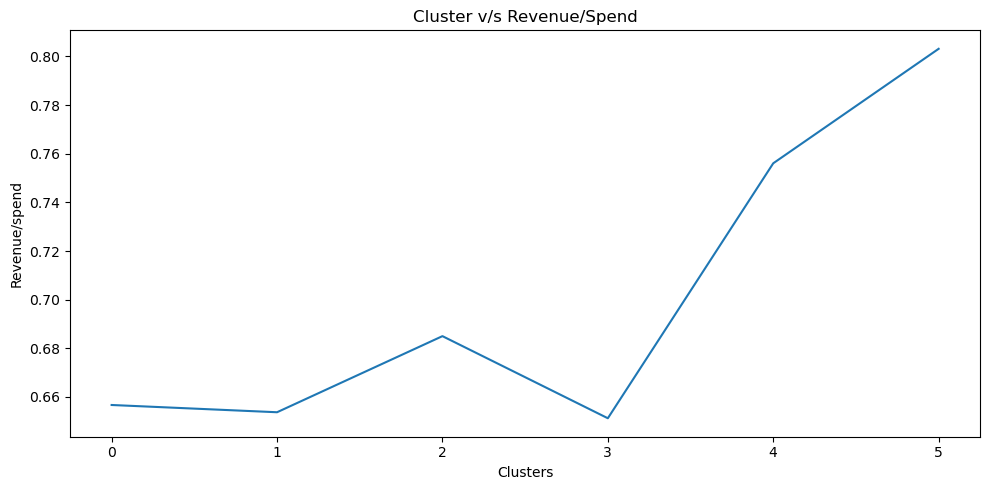

In [104]:
plt.figure(figsize=(10,5))
sns.lineplot(data=Aggdata_Kmeans, x= Aggdata_Kmeans.index, y = Aggdata_Kmeans['Revenue/spend'])
plt.title('Cluster v/s Revenue/Spend')
plt.tight_layout()
plt.savefig('cluster_revenue.jpg')
plt.show()

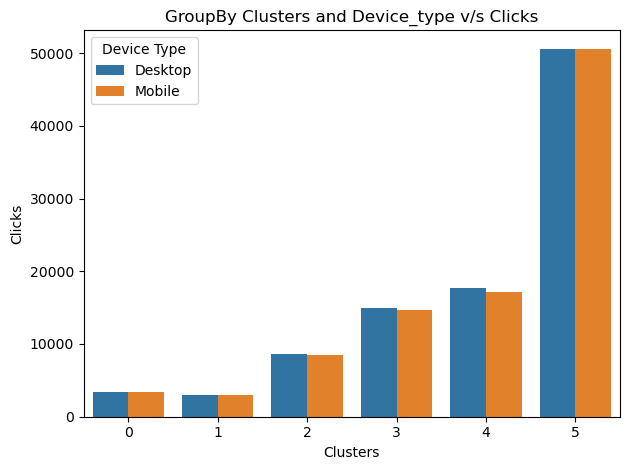

In [105]:
df200 = dfK.groupby(['Clusters', 'Device Type']).agg(Clicks=("Clicks", 'mean')).reset_index()
sns.barplot(data = df200, x = 'Clusters', y = 'Clicks', hue='Device Type')
plt.title('GroupBy Clusters and Device_type v/s Clicks')
plt.tight_layout()
plt.savefig('CLICKS.jpg')
plt.show()

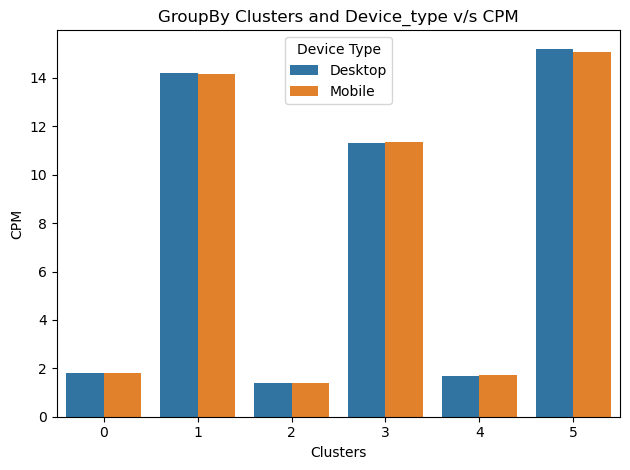

In [106]:
df201 = dfK.groupby(['Clusters', 'Device Type']).agg(CPM=("CPM", 'mean')).reset_index()
sns.barplot(data = df201, x = 'Clusters', y = 'CPM', hue='Device Type')
plt.title('GroupBy Clusters and Device_type v/s CPM')
plt.tight_layout()
plt.savefig('CPM.jpg')
plt.show()

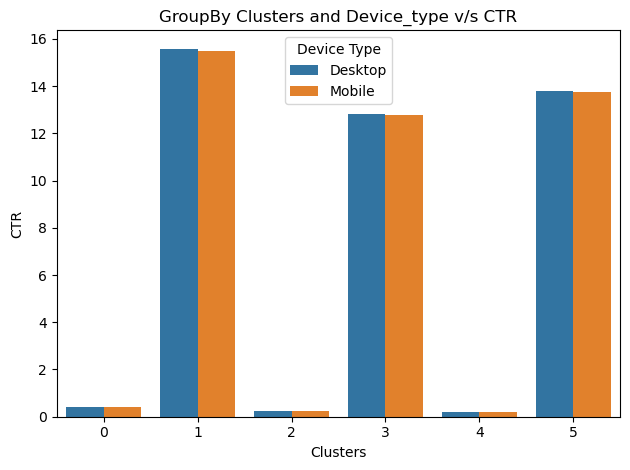

In [107]:
df202 = dfK.groupby(['Clusters', 'Device Type']).agg(CTR=("CTR", 'mean')).reset_index()
sns.barplot(data = df202, x = 'Clusters', y = 'CTR', hue='Device Type')
plt.title('GroupBy Clusters and Device_type v/s CTR')
plt.tight_layout()
plt.savefig('CTR.jpg')
plt.show()

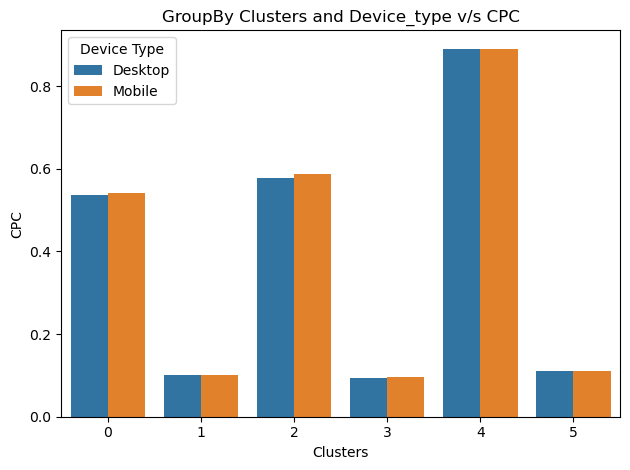

In [108]:
df203 = dfK.groupby(['Clusters', 'Device Type']).agg(CPC=("CPC", 'mean')).reset_index()
sns.barplot(data = df203, x = 'Clusters', y = 'CPC', hue='Device Type')
plt.title('GroupBy Clusters and Device_type v/s CPC')
plt.tight_layout()
plt.savefig('CPC.jpg')
plt.show()

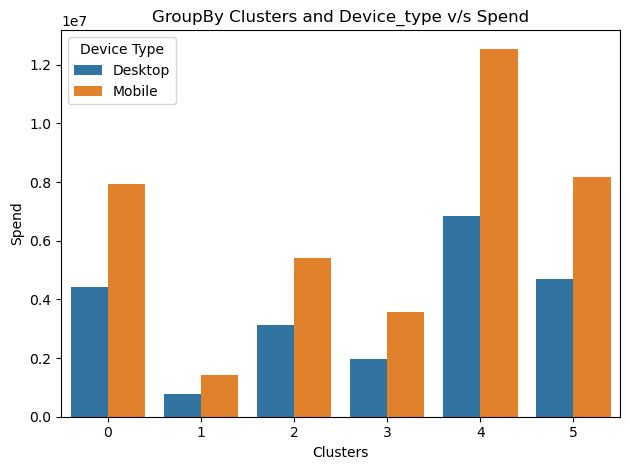

In [109]:
df204 = dfK.groupby(['Clusters', 'Device Type']).agg(Spend=("Spend", 'sum')).reset_index()
sns.barplot(data = df204, x = 'Clusters', y = 'Spend', hue='Device Type')
plt.title('GroupBy Clusters and Device_type v/s Spend')
plt.tight_layout()
plt.savefig('SPEND.jpg')
plt.show()

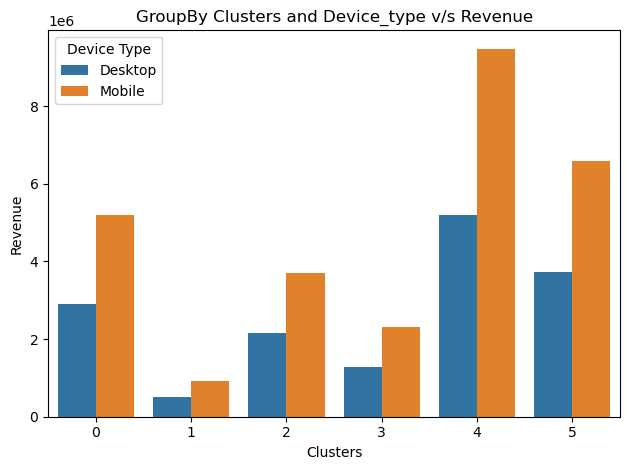

In [110]:
df205 = dfK.groupby(['Clusters', 'Device Type']).agg(Revenue=("Revenue", 'sum')).reset_index()
sns.barplot(data = df205, x = 'Clusters', y = 'Revenue', hue='Device Type')
plt.title('GroupBy Clusters and Device_type v/s Revenue')
plt.tight_layout()
plt.savefig('REVENUE.jpg')
plt.show()

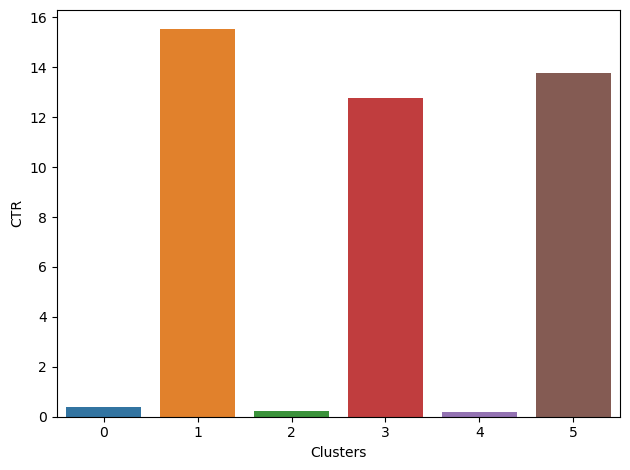

In [111]:
sns.barplot(data=Aggdata_Kmeans , x = Aggdata_Kmeans.index , y = Aggdata_Kmeans.CTR)

plt.tight_layout()
plt.savefig('CPM.jpg')

In [112]:
dfK['Profit'] = dfK['Revenue'] - dfK['Spend']
df206 = dfK.groupby(['Clusters', 'Device Type']).agg(Profit=("Profit", 'sum')).unstack()
df206

Profit              
Device Type       Desktop        Mobile
Clusters                               
0           -1.514132e+06 -2.719719e+06
1           -2.674553e+05 -4.881536e+05
2           -9.796245e+05 -1.712781e+06
3           -6.875358e+05 -1.239620e+06
4           -1.667024e+06 -3.066759e+06
5           -9.513143e+05 -1.576692e+06

## PCA

In [269]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.decomposition import PCA
from statsmodels import multivariate
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo

In [270]:
df_pca = pd.read_excel('PCA+India+Data_Census.xlsx')

In [271]:
df_pca.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,...,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,...,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,...,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,...,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,...,874,1928,465,1043,205,302,24,105,180,478


In [272]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [273]:
df_pca.shape

(640, 61)

In [274]:
df_pca.isna().sum()[df_pca.isna().sum() > 0]

Series([], dtype: int64)

In [275]:
df_pca.duplicated().sum()

0

In [276]:
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [277]:
df_pca.columns

Index(['State Code', 'Dist.Code', 'State', 'Area Name', 'No_HH', 'TOT_M',
       'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT',
       'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M',
       'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M',
       'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F',
       'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M',
       'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M',
       'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M',
       'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M',
       'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M',
       'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M',
       'NON_WORK_F'],
      dtype='object')

In [278]:
state = df_pca.groupby('State')[['TOT_F', 'TOT_M']].sum()

In [279]:
state['Female/Male'] = state['TOT_F']/state['TOT_M']

In [280]:
state.sort_values(by = 'Female/Male', ascending=True).head(2)

,TOT_F,TOT_M,Female/Male
State,,,
Lakshadweep,14772,12823,1.151993
Haryana,1498873,1167816,1.283484


In [281]:
state.sort_values(by = 'Female/Male', ascending=False).head(2)

,TOT_F,TOT_M,Female/Male
State,,,
Andhra Pradesh,6097235,3274363,1.862113
Tamil Nadu,5610310,3074009,1.825079


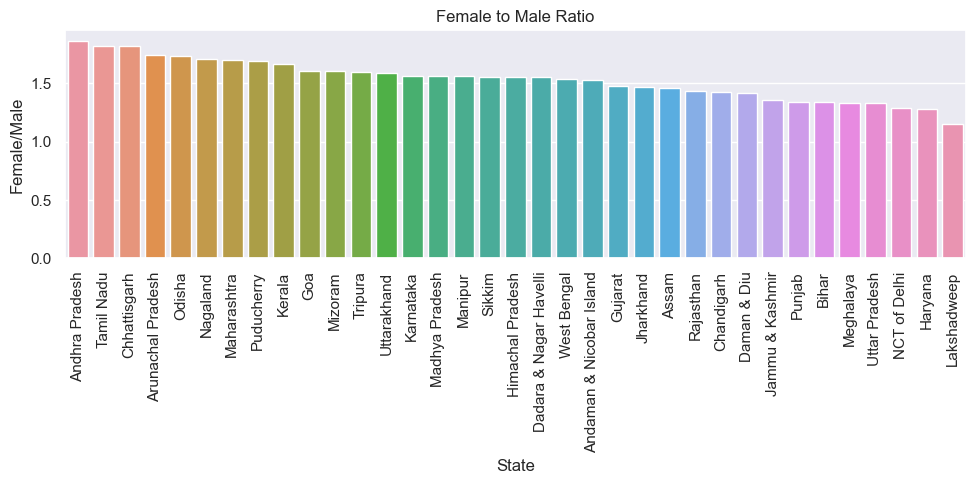

In [282]:
sns.set(font_scale = 1)
plt.figure(figsize=(10,5))
sns.barplot(data=state, x = state.index, y = 'Female/Male', order=state['Female/Male'].sort_values(ascending=False).index)

plt.xticks(rotation = 90)
plt.title('Female to Male Ratio')
plt.tight_layout()
plt.savefig('Female_Male_R.jpg')
plt.show()

In [283]:
df_pca.columns

Index(['State Code', 'Dist.Code', 'State', 'Area Name', 'No_HH', 'TOT_M',
       'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT',
       'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M',
       'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F',
       'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M',
       'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F',
       'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M',
       'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M',
       'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M',
       'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M',
       'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M',
       'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M',
       'NON_WORK_F'],
      dtype='object')

In [284]:
eda_cols = ['TOT_M' , 'TOT_F' , 'TOT_WORK_M' , 'TOT_WORK_F' , 'MARG_AL_M', 'MARG_AL_F']

In [285]:
df_eda = df_pca[eda_cols]
df_eda.head()

,TOT_M,TOT_F,TOT_WORK_M,TOT_WORK_F,MARG_AL_M,MARG_AL_F
0,23388,29796,6723,3752,2052,641
1,19585,23102,6982,4200,915,547
2,6546,10964,2775,4800,44,157
3,2784,4206,1002,1118,63,176
4,20591,29981,5717,7692,1037,1069


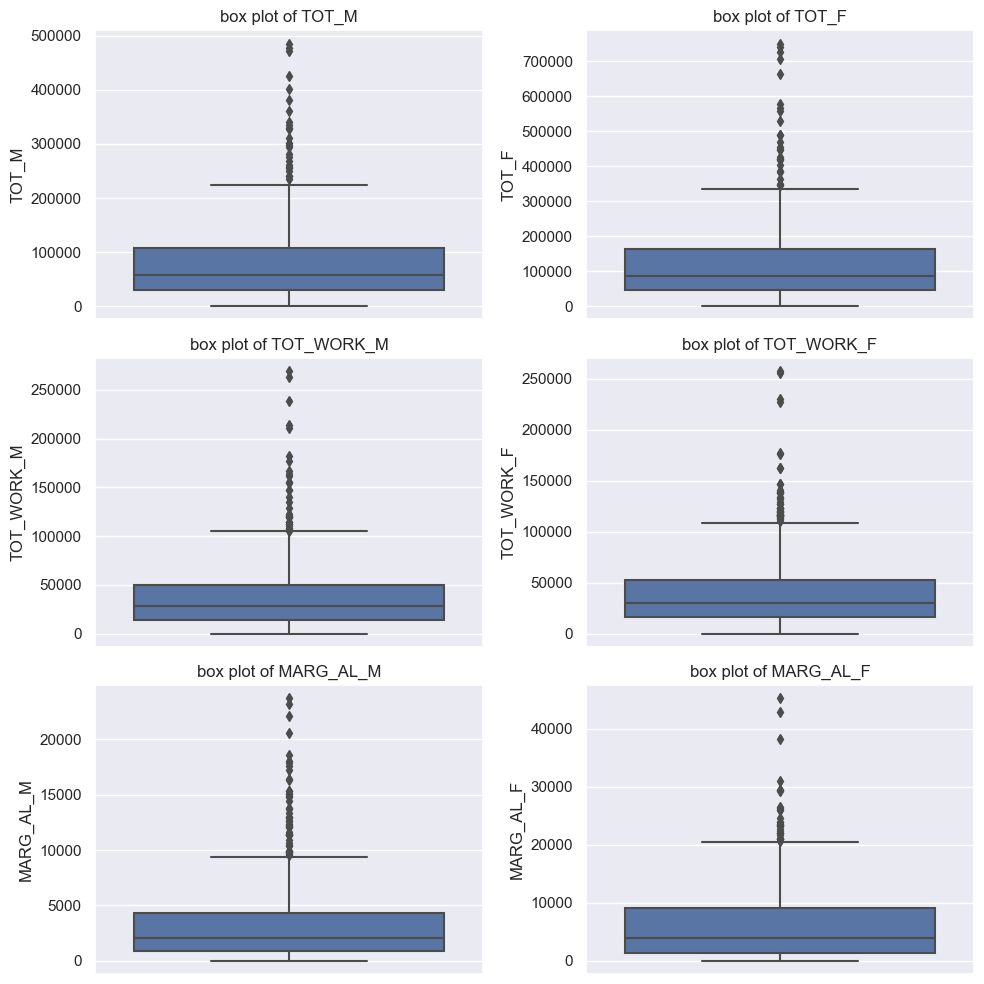

In [286]:
plt.figure(figsize=(10,10))
for i in range(0, len(eda_cols)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data= df_eda, y = df_eda[eda_cols[i]])
    plt.title(f'box plot of {eda_cols[i]}')
    plt.tight_layout()

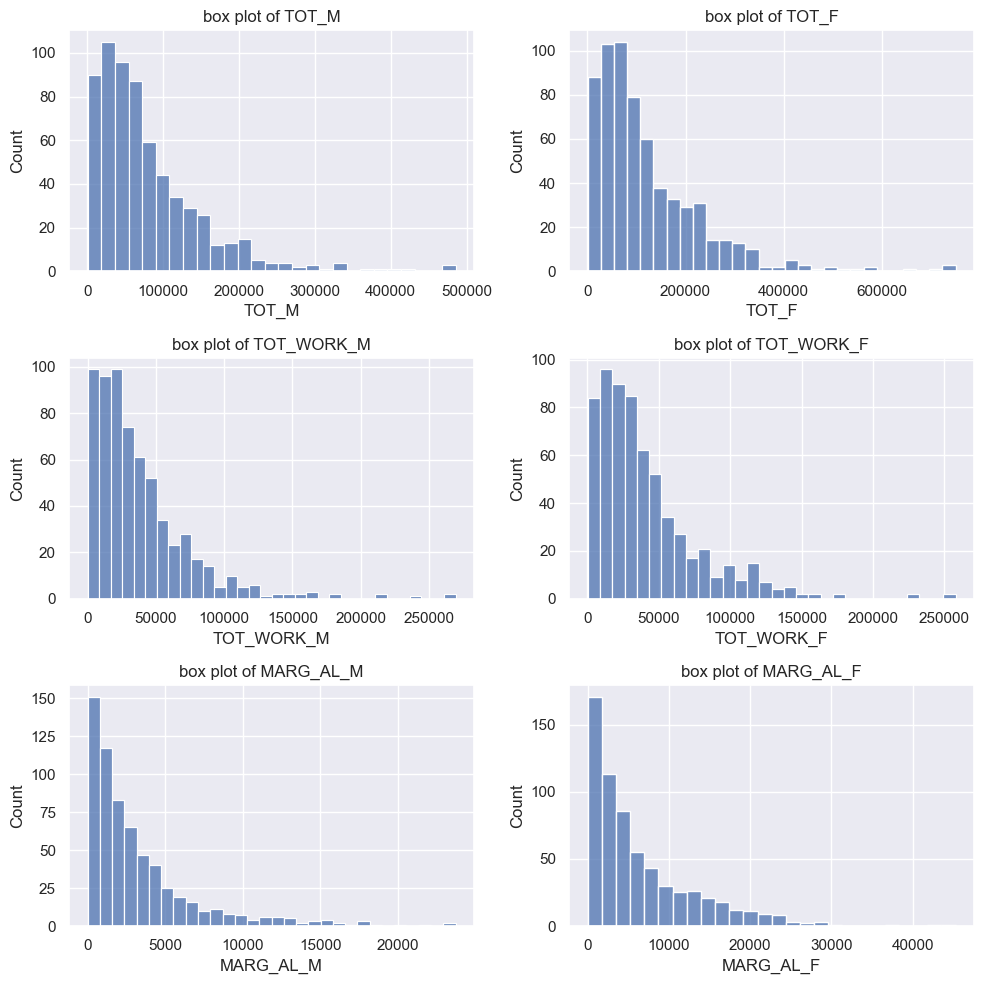

In [287]:
plt.figure(figsize=(10,10))
for i in range(0, len(eda_cols)):
    plt.subplot(3, 2, i+1)
    sns.histplot(data= df_eda, x = df_eda[eda_cols[i]])
    plt.title(f'box plot of {eda_cols[i]}')
    plt.tight_layout()

In [288]:
dist = df_pca.groupby('Dist.Code')[['TOT_F', 'TOT_M']].sum()

In [289]:
dist['Female/Male'] = dist['TOT_F']/dist['TOT_M']

In [290]:
dist.sort_values(by = 'Female/Male', ascending=True).head(2)

,TOT_F,TOT_M,Female/Male
Dist.Code,,,
587,14772,12823,1.151993
2,23102,19585,1.179576


In [291]:
x1 = df_pca[df_pca['Dist.Code'] == 587].squeeze()
pd.set_option('display.max_rows', 1000)
print(x1)

State Code                 31
Dist.Code                 587
State             Lakshadweep
Area Name         Lakshadweep
No_HH                    4445
TOT_M                   12823
TOT_F                   14772
M_06                     1719
F_06                     1587
M_SC                        0
F_SC                        0
M_ST                    12680
F_ST                    14564
M_LIT                   10601
F_LIT                   11334
M_ILL                    2222
F_ILL                    3438
TOT_WORK_M               5115
TOT_WORK_F               1780
MAINWORK_M               2849
MAINWORK_F                862
MAIN_CL_M                   0
MAIN_CL_F                   0
MAIN_AL_M                   0
MAIN_AL_F                   0
MAIN_HH_M                  31
MAIN_HH_F                  17
MAIN_OT_M                2818
MAIN_OT_F                 845
MARGWORK_M               2266
MARGWORK_F                918
MARG_CL_M                   0
MARG_CL_F                   0
MARG_AL_M 

In [292]:
dist.sort_values(by = 'Female/Male', ascending=False).head(2)

,TOT_F,TOT_M,Female/Male
Dist.Code,,,
547,314182,137603,2.283250
398,86272,38026,2.268763


In [293]:
df_pca[df_pca['Dist.Code'] == 547][['State', 'Area Name']]

,State,Area Name
546,Andhra Pradesh,Krishna


In [294]:
df_pca[df_pca['Dist.Code'] == 587][['State', 'Area Name']]

,State,Area Name
586,Lakshadweep,Lakshadweep


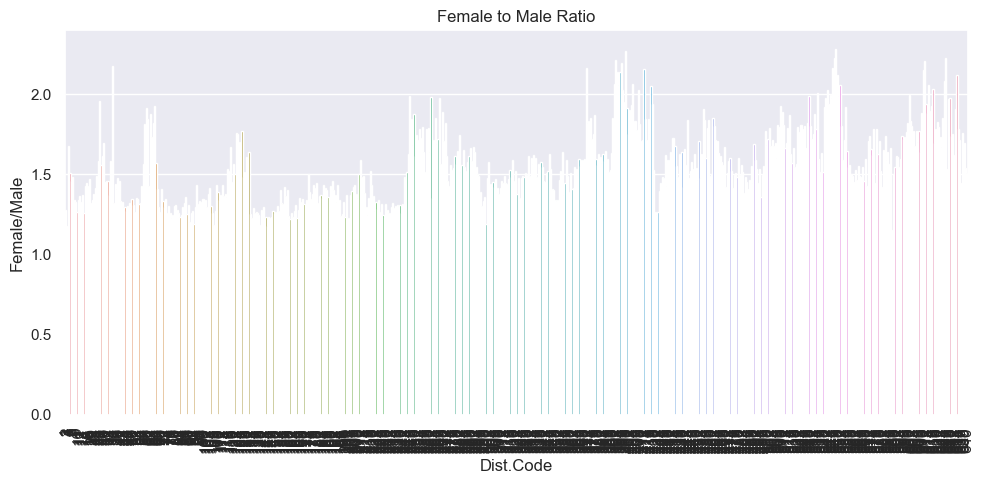

In [295]:
plt.figure(figsize=(10,5))
sns.barplot(data=dist, x = dist.index, y = 'Female/Male')
plt.xticks(rotation = 90)
plt.title('Female to Male Ratio')
plt.tight_layout()

In [296]:
x2 = df_pca.groupby('State')[['TOT_WORK_M' , 'MAIN_AL_M']].sum()
x2['AL_M/TOT_WRK_M'] = x2['MAIN_AL_M']/x2['TOT_WORK_M']
x2.sort_values('AL_M/TOT_WRK_M', ascending= False).head()

,TOT_WORK_M,MAIN_AL_M,AL_M/TOT_WRK_M
State,,,
Andhra Pradesh,1674517,490307,0.292805
Bihar,1524553,403261,0.264511
Gujarat,1057781,208481,0.197093
Chhattisgarh,398935,75308,0.188773
Madhya Pradesh,1004639,187847,0.186980


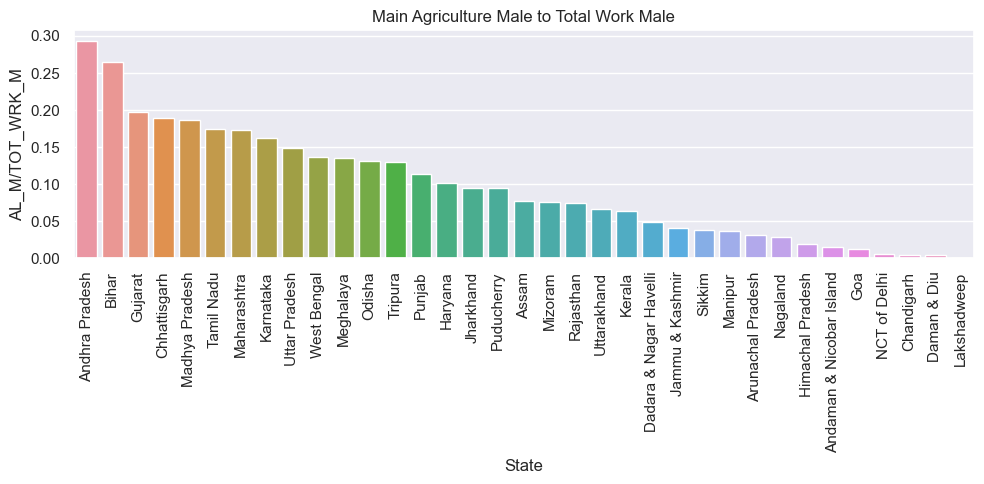

In [297]:
plt.figure(figsize=(10,5))
sns.barplot(data=x2, x = x2.index, y = 'AL_M/TOT_WRK_M', order=x2['AL_M/TOT_WRK_M'].sort_values(ascending=False).index)
plt.xticks(rotation = 90)
plt.title('Main Agriculture Male to Total Work Male')
plt.tight_layout()
plt.savefig('AL_M_TOT_WRK_M.jpg')
plt.show()

In [298]:
x3 = df_pca.groupby(by = 'State')[['TOT_M', 'TOT_F', 'M_LIT' , 'F_LIT']].sum()
x3['TOTAL_POP'] = x3.TOT_F + x3.TOT_M
x3['TOTAL_LIT'] = x3.M_LIT + x3.F_LIT
x3['Literacy_ratio'] = x3['TOTAL_LIT']/x3['TOTAL_POP']
x3.sort_values(by = 'Literacy_ratio', ascending=False).head(5)

,TOT_M,TOT_F,M_LIT,F_LIT,TOTAL_POP,TOTAL_LIT,Literacy_ratio
State,,,,,,,
Mizoram,59534,95463,48512,79412,154997,127924,0.825332
Kerala,2919825,4856357,2370331,3878204,7776182,6248535,0.803548
Lakshadweep,12823,14772,10601,11334,27595,21935,0.794890
Goa,118979,191393,99381,139749,310372,239130,0.770463
Chandigarh,41753,59644,33552,43438,101397,76990,0.759293


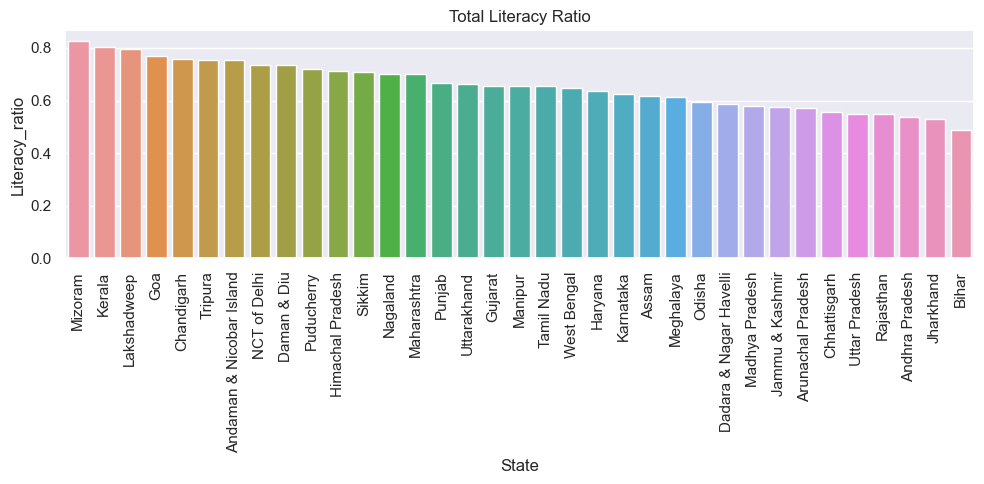

In [299]:
plt.figure(figsize=(10,5))
sns.barplot(data=x3, x = x3.index, y = 'Literacy_ratio', order=x3['Literacy_ratio'].sort_values(ascending=False).index)
plt.xticks(rotation = 90)
plt.title('Total Literacy Ratio')
plt.tight_layout()
plt.savefig('Literacy_ratio.jpg')
plt.show()

In [300]:
x4 = df_pca.groupby(by = 'State')[['TOT_M', 'TOT_F', 'TOT_WORK_M' , 'TOT_WORK_F']].sum()
x4['TOTAL_POP'] = x4.TOT_F + x4.TOT_M
x4['TOTAL_WORK'] = x4.TOT_WORK_M + x4.TOT_WORK_F
x4['working_ratio'] = x4['TOTAL_WORK']/x4['TOTAL_POP']
x4.sort_values(by = 'working_ratio', ascending=False).head(5)

,TOT_M,TOT_F,TOT_WORK_M,TOT_WORK_F,TOTAL_POP,TOTAL_WORK,working_ratio
State,,,,,,,
Nagaland,73506,125935,30889,70104,199441,100993,0.506380
Sikkim,26664,41518,13608,20161,68182,33769,0.495277
Andhra Pradesh,3274363,6097235,1674517,2833719,9371598,4508236,0.481053
Tamil Nadu,3074009,5610310,1724274,2441679,8684319,4165953,0.479710
Chhattisgarh,838404,1526592,398935,732456,2364996,1131391,0.478390


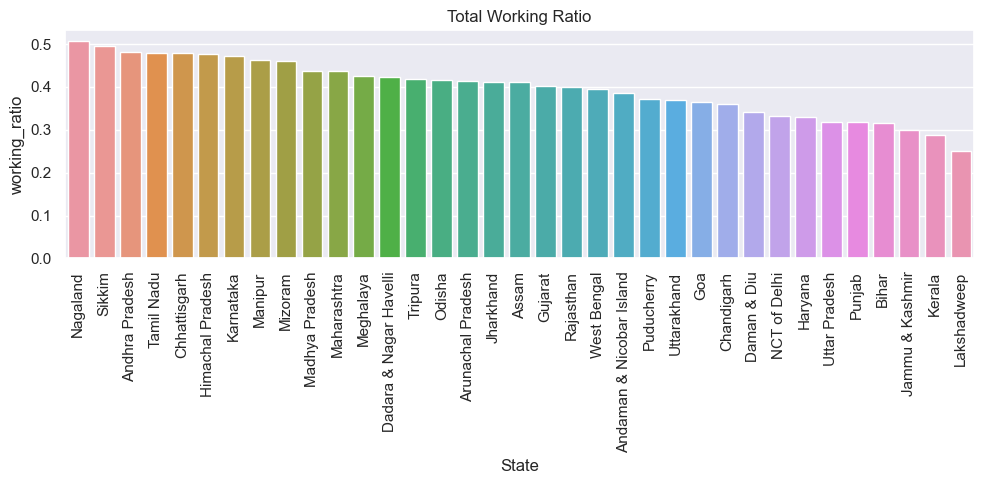

In [301]:
plt.figure(figsize=(10,5))
sns.barplot(data=x4, x = x4.index, y = 'working_ratio', order=x4['working_ratio'].sort_values(ascending=False).index)
plt.xticks(rotation = 90)
plt.title('Total Working Ratio')
plt.tight_layout()
plt.savefig('working_ratio.jpg')
plt.show()

In [302]:
df_pca_num = df_pca.select_dtypes(include=['float64', 'int64'])
df_pca_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   State Code      640 non-null    int64
 1   Dist.Code       640 non-null    int64
 2   No_HH           640 non-null    int64
 3   TOT_M           640 non-null    int64
 4   TOT_F           640 non-null    int64
 5   M_06            640 non-null    int64
 6   F_06            640 non-null    int64
 7   M_SC            640 non-null    int64
 8   F_SC            640 non-null    int64
 9   M_ST            640 non-null    int64
 10  F_ST            640 non-null    int64
 11  M_LIT           640 non-null    int64
 12  F_LIT           640 non-null    int64
 13  M_ILL           640 non-null    int64
 14  F_ILL           640 non-null    int64
 15  TOT_WORK_M      640 non-null    int64
 16  TOT_WORK_F      640 non-null    int64
 17  MAINWORK_M      640 non-null    int64
 18  MAINWORK_F      640 non-null  

In [303]:
df_pca_cat = df_pca.select_dtypes(include=['object'])
df_pca_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      640 non-null    object
 1   Area Name  640 non-null    object
dtypes: object(2)
memory usage: 10.1+ KB


In [304]:
df_pca_num = df_pca_num.drop(columns=['State Code', 'Dist.Code'])
df_pca_num.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,7707,23388,29796,5862,6196,3,0,1999,2598,13381,...,1150,749,180,237,680,252,32,46,258,214
1,6218,19585,23102,4482,3733,7,6,427,517,10513,...,525,715,123,229,186,148,76,178,140,160
2,4452,6546,10964,1082,1018,3,6,5806,9723,4534,...,114,188,44,89,3,34,0,4,67,61
3,1320,2784,4206,563,677,0,0,2666,3968,1842,...,194,247,61,128,13,50,4,10,116,59
4,11654,20591,29981,5157,4587,20,33,7670,10843,13243,...,874,1928,465,1043,205,302,24,105,180,478


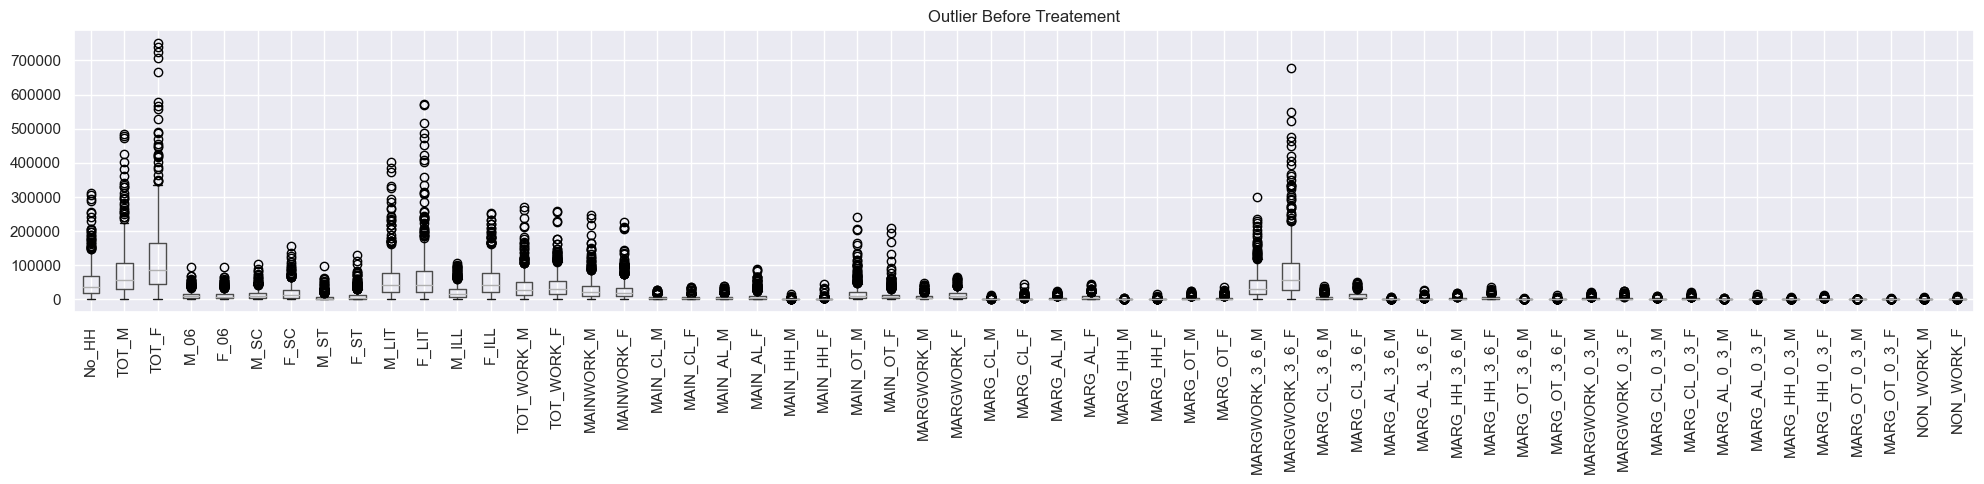

In [305]:
df_pca_num.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.title('Outlier Before Treatement')
plt.tight_layout()
plt.savefig('pca_outlier.jpg')
plt.show()

In [306]:
df_pca_num.describe().T

,count,mean,std,min,25%,50%,75%,max
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0
F_ST,640.0,10155.640625,15875.701488,0.0,429.50,3834.5,12480.25,130119.0
M_LIT,640.0,57967.979688,55910.282466,286.0,21298.00,42693.5,77989.50,403261.0


In [307]:
#treating outliers upper bound to 95th and lower bound to 5th percentile
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    q95=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: q95 if y > q95 else y).apply(lambda y: q5 if y < q5 else y)

In [308]:
for i in df_pca_num.columns:    
    df_pca_num[i]=treat_outlier(df_pca_num[i])

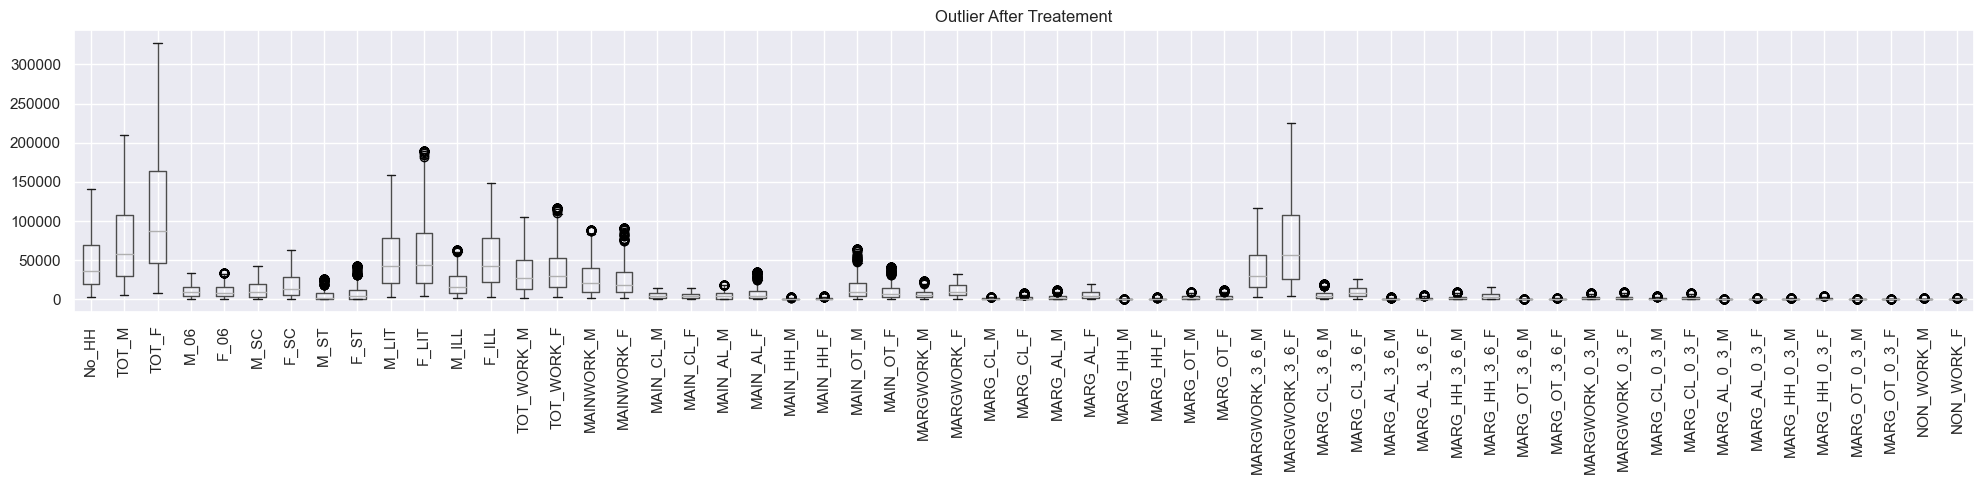

In [309]:
df_pca_num.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.title('Outlier After Treatement')
plt.tight_layout()
plt.savefig('pca_outlier_after_treating.jpg')
plt.show()

In [310]:
from sklearn.preprocessing import StandardScaler

X1 = StandardScaler()
df_pca_scaled = pd.DataFrame(X1.fit_transform(df_pca_num), columns=df_pca_num.columns)
df_pca_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-1.045396,-0.891093,-0.948655,-0.627243,-0.561564,-1.088269,-1.087541,-0.491763,-0.544801,-0.948906,...,-0.123025,-0.860457,-0.123555,-0.418670,0.339741,-0.755448,-0.435727,-0.725870,-0.490325,-0.742187
1,-1.083544,-0.956140,-1.022636,-0.776917,-0.833168,-1.087937,-1.087210,-0.711309,-0.717087,-1.015165,...,-0.696086,-0.876554,-0.357224,-0.434212,-0.590151,-0.837704,0.194593,0.043136,-0.768274,-0.838021
2,-1.128788,-1.179163,-1.156783,-1.145679,-1.132562,-1.088269,-1.087210,0.039924,0.045079,-1.153297,...,-1.072931,-1.126059,-0.681081,-0.706208,-0.921543,-0.927869,-0.865491,-0.953076,-0.940226,-1.013717
3,-1.158017,-1.201253,-1.189446,-1.187881,-1.169642,-1.088518,-1.087541,-0.398610,-0.431378,-1.171017,...,-0.999580,-1.098126,-0.611390,-0.630438,-0.915802,-0.915214,-0.836840,-0.935599,-0.824806,-1.017267
4,-0.944274,-0.938933,-0.946611,-0.703707,-0.738994,-1.086858,-1.085718,0.300251,0.137804,-0.952094,...,-0.376089,-0.302265,1.044790,1.147247,-0.554386,-0.715901,-0.550330,-0.382147,-0.674054,-0.273664


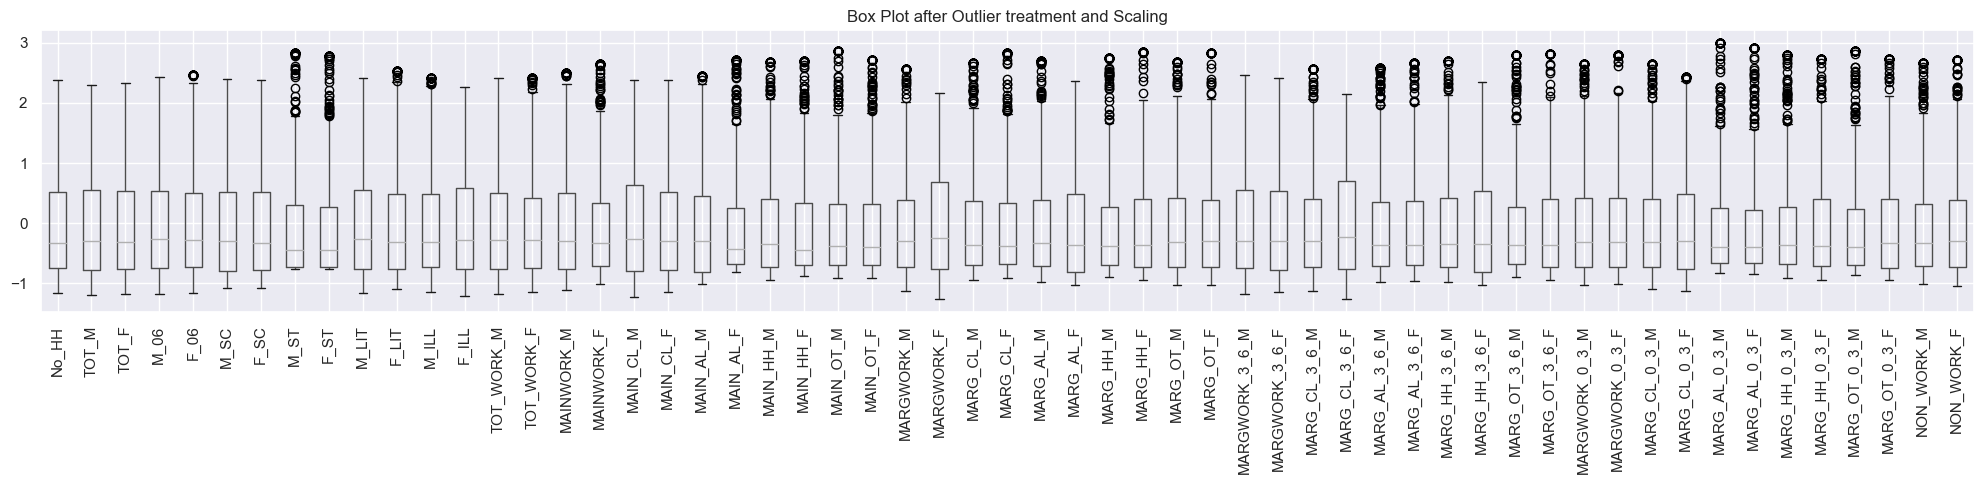

In [311]:
df_pca_scaled.boxplot(figsize=(20,5))
plt.xticks(rotation=90)
plt.title('Box Plot after Outlier treatment and Scaling')
plt.tight_layout()
plt.savefig('pca_outlier_after_scaling.jpg')
plt.show()

In [312]:
#sns.pairplot(data=df_pca_scaled)

### Statistical tests to be done before PCA

#### Bartletts Test of Sphericity
Bartlett's test of sphericity tests the hypothesis that the variables are uncorrelated in the population.

- H0: All variables in the data are uncorrelated
- Ha: At least one pair of variables in the data are correlated

If the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the null hypothesis and agree that there is atleast one pair of vairbales in the data wihich are correlated hence PCA is recommended.

In [315]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

0.0

#### KMO Test

The Kaiser-Meyer-Olkin (KMO) - measure of sampling adequacy (MSA) is an index used to examine how appropriate PCA is.

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA > 0.7 is expected to provide a considerable reduction is the dimension and extraction of meaningful components.

In [317]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

0.9307784855021931

In [318]:
df_pca_scaled.shape

(640, 57)

In [319]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30, random_state=123)
df500 = pca.fit_transform(df_pca_scaled)
df500.transpose().round(2)

array([[-5.47, -5.49, -7.25, ..., -7.47, -7.56, -7.17],
       [ 0.36, -0.06, -0.18, ..., -0.8 , -0.84, -1.17],
       [-1.49, -1.93, -0.43, ..., -0.98, -0.94, -0.98],
       ...,
       [ 0.02,  0.08,  0.02, ...,  0.08,  0.02, -0.  ],
       [ 0.04,  0.06,  0.14, ...,  0.01, -0.  ,  0.01],
       [-0.29, -0.06,  0.1 , ..., -0.01,  0.02,  0.01]])

In [338]:
pca.components_

array([[ 0.15023744,  0.16052153,  0.15955834,  0.15761302,  0.15793782,
         0.14451325,  0.14466826,  0.02057879,  0.02007136,  0.15665658,
         0.14649998,  0.15535454,  0.15919561,  0.15501616,  0.14256675,
         0.1423067 ,  0.12271454,  0.11099373,  0.0821699 ,  0.11870991,
         0.08549612,  0.14209634,  0.13150454,  0.12068193,  0.11531875,
         0.15740929,  0.14926881,  0.08720886,  0.06175836,  0.12804164,
         0.11558316,  0.14424257,  0.14114154,  0.15088074,  0.14678382,
         0.15936886,  0.15740658,  0.15843512,  0.14988112,  0.09411087,
         0.06412445,  0.12874136,  0.11328228,  0.14408264,  0.1400067 ,
         0.1509216 ,  0.14672375,  0.1436583 ,  0.13475745,  0.06295529,
         0.05461612,  0.12032954,  0.11408846,  0.14092803,  0.14148045,
         0.14763628,  0.14086398],
       [-0.11528684, -0.07678683, -0.09111385, -0.01772982, -0.01201197,
        -0.07576671, -0.08388159,  0.0576686 ,  0.05622673, -0.10209954,
        -0.13101

In [320]:
df500

array([[-5.46638082e+00,  3.57639427e-01, -1.48530020e+00, ...,
         2.45957995e-02,  4.13272255e-02, -2.86597017e-01],
       [-5.48683847e+00, -6.08169629e-02, -1.92712777e+00, ...,
         8.17099568e-02,  6.16624047e-02, -5.93661468e-02],
       [-7.24926712e+00, -1.81424132e-01, -4.32522156e-01, ...,
         2.49722343e-02,  1.40217535e-01,  9.85854506e-02],
       ...,
       [-7.46686664e+00, -7.95216841e-01, -9.78363175e-01, ...,
         7.79052084e-02,  1.12490789e-02, -1.04781992e-02],
       [-7.56454575e+00, -8.37586076e-01, -9.41895748e-01, ...,
         2.16808150e-02, -3.87423348e-03,  1.92909141e-02],
       [-7.16980342e+00, -1.17322829e+00, -9.83627191e-01, ...,
        -1.31571129e-03,  1.25013237e-02,  8.86580897e-03]])

In [321]:
#Step 1: Obtaining the Eigen Vectors when the Principal Components are kept exactly as the number of features in the scaled data
print('Eigen Vectors \n %s',pca.components_.round(2))

Eigen Vectors 
 %s [[ 0.15  0.16  0.16 ...  0.14  0.15  0.14]
 [-0.12 -0.08 -0.09 ...  0.04 -0.05 -0.05]
 [ 0.1  -0.03  0.03 ... -0.1  -0.14 -0.04]
 ...
 [-0.05  0.05 -0.06 ... -0.22 -0.14  0.11]
 [ 0.1   0.01 -0.01 ...  0.36 -0.06  0.  ]
 [-0.09 -0.   -0.02 ... -0.1  -0.07  0.12]]


In [322]:
var_exp = pca.explained_variance_ratio_
print(var_exp.round(2))

[0.62 0.14 0.07 0.05 0.04 0.02 0.02 0.01 0.01 0.01 0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]


In [323]:
# Step 2: Obtaining the Cumulative Sum of the Expalained Variance 
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))

Cumulative Variance Explained in Percentage: [61.65 75.24 81.99 87.13 90.66 92.77 94.61 95.44 96.11 96.66 97.16 97.53
 97.85 98.12 98.36 98.57 98.75 98.9  99.05 99.18 99.3  99.4  99.48 99.55
 99.61 99.66 99.71 99.75 99.79 99.82]


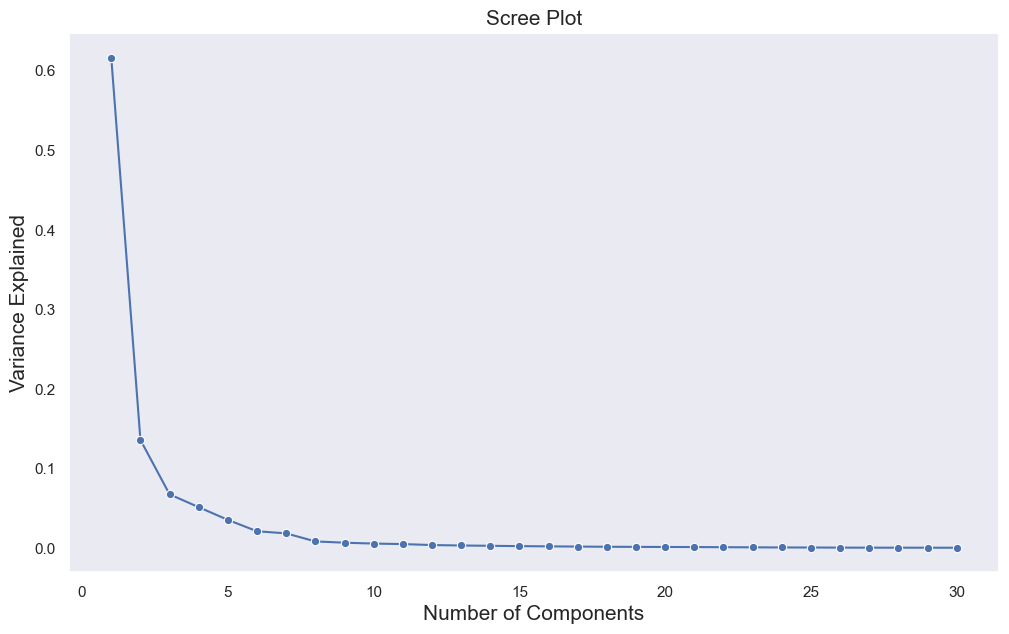

In [324]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

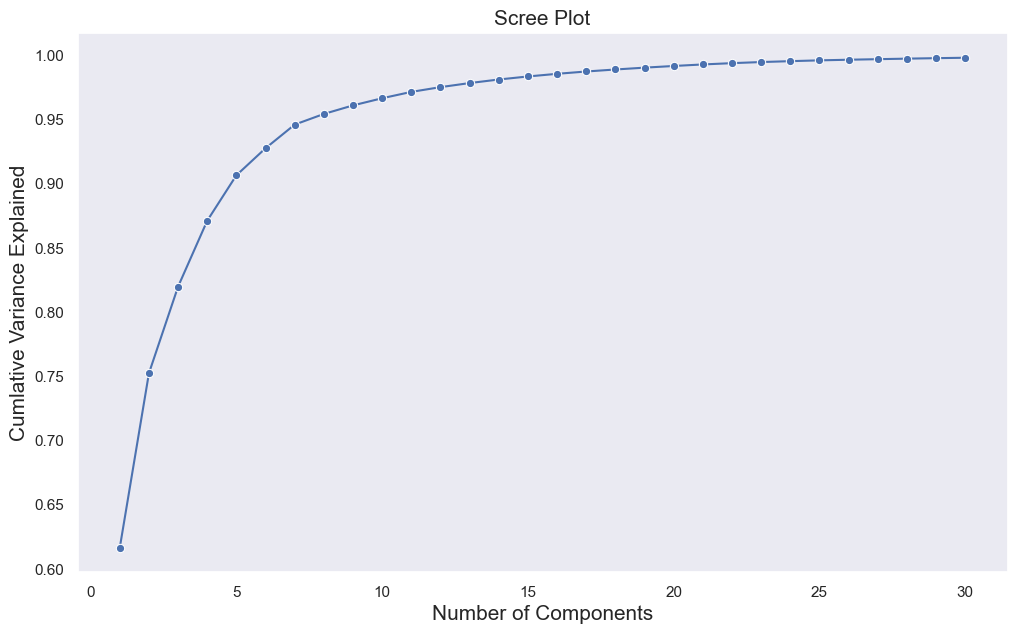

In [325]:
plt.figure(figsize=(12,7))
sns.lineplot(y=cum_var_exp,x=range(1,len(cum_var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Cumlative Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

In [401]:
# Step 4 Apply PCA for the number of decided components to get the loadings and component output

# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA
# NOTE - we are generating only 6 PCA dimensions 
pca = PCA(n_components=6, random_state=123)
df_pca = pca.fit_transform(df_pca_scaled)
df_pca.transpose().round(2) # Component output

array([[-5.47, -5.49, -7.25, ..., -7.47, -7.56, -7.17],
       [ 0.36, -0.06, -0.18, ..., -0.8 , -0.84, -1.17],
       [-1.49, -1.93, -0.43, ..., -0.98, -0.94, -0.98],
       [-1.13, -1.55, -0.11, ..., -1.03, -0.78, -0.63],
       [ 0.37,  0.01,  0.56, ...,  0.13,  0.01,  0.15],
       [-0.49,  0.92,  0.17, ...,  0.11, -0.26, -0.39]])

In [403]:
pca.components_.round(2)

array([[ 0.15,  0.16,  0.16,  0.16,  0.16,  0.14,  0.14,  0.02,  0.02,
         0.16,  0.15,  0.16,  0.16,  0.16,  0.14,  0.14,  0.12,  0.11,
         0.08,  0.12,  0.09,  0.14,  0.13,  0.12,  0.12,  0.16,  0.15,
         0.09,  0.06,  0.13,  0.12,  0.14,  0.14,  0.15,  0.15,  0.16,
         0.16,  0.16,  0.15,  0.09,  0.06,  0.13,  0.11,  0.14,  0.14,
         0.15,  0.15,  0.14,  0.13,  0.06,  0.05,  0.12,  0.11,  0.14,
         0.14,  0.15,  0.14],
       [-0.12, -0.08, -0.09, -0.02, -0.01, -0.08, -0.08,  0.06,  0.06,
        -0.1 , -0.13, -0.01, -0.02, -0.12, -0.08, -0.17, -0.15,  0.05,
         0.1 , -0.05, -0.09, -0.1 , -0.12, -0.21, -0.21,  0.08,  0.11,
         0.27,  0.27,  0.16,  0.13,  0.05,  0.01, -0.08, -0.1 , -0.04,
        -0.09,  0.07,  0.09,  0.26,  0.26,  0.15,  0.12,  0.05, -0.  ,
        -0.08, -0.11,  0.14,  0.17,  0.28,  0.28,  0.18,  0.18,  0.07,
         0.04, -0.05, -0.05],
       [ 0.1 , -0.03,  0.03, -0.07, -0.06, -0.03,  0.02,  0.3 ,  0.32,
        -0.03, -0

In [415]:
pca.explained_variance_

array([35.19645077,  7.75864164,  3.85313758,  2.93088251,  2.01945117,
        1.20283006])

In [423]:
pca.explained_variance_ratio_

array([0.61651678, 0.13590384, 0.06749328, 0.05133865, 0.03537361,
       0.02106931])

In [425]:
var_exp = pca.explained_variance_ratio_
#print(var_exp.round(2))
cum_var_exp = np.cumsum(var_exp)
print('Cumulative Variance Explained in Percentage:',(cum_var_exp*100).round(2))
print(' Variance Explained in Percentage:',var_exp.round(2))


Cumulative Variance Explained in Percentage: [61.65 75.24 81.99 87.13 90.66 92.77]
 Variance Explained in Percentage: [0.62 0.14 0.07 0.05 0.04 0.02]


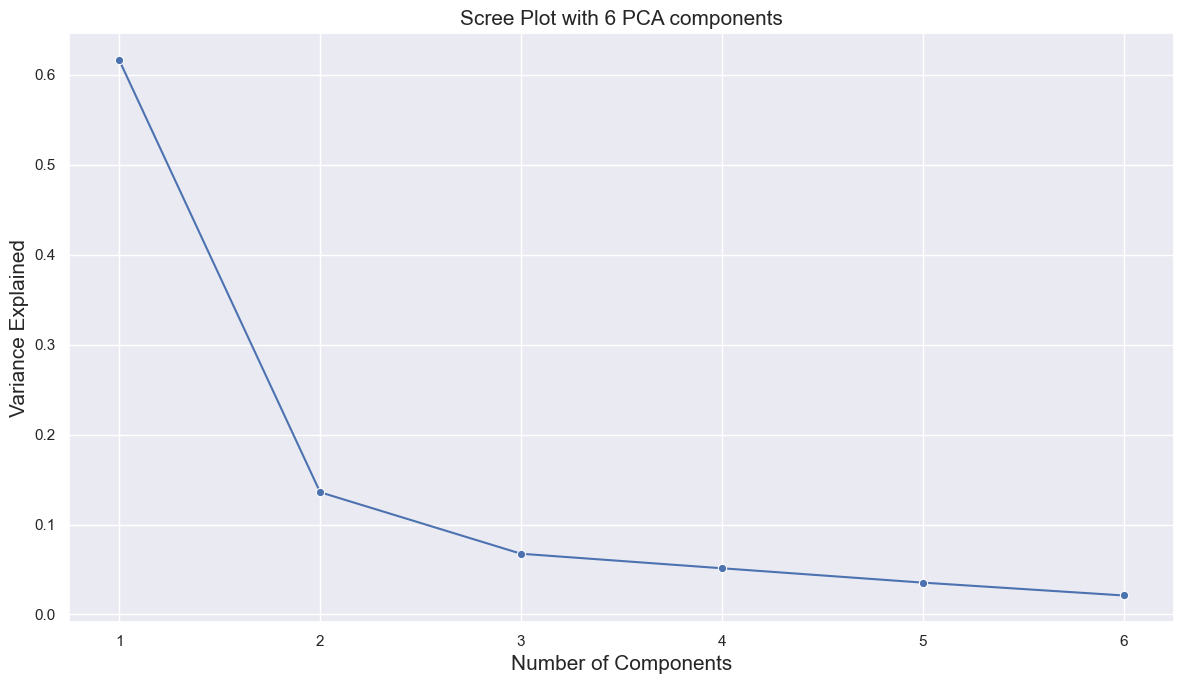

In [417]:
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot with 6 PCA components',fontsize=15)
plt.tight_layout()
plt.savefig('scree_6.jpg')
plt.show()

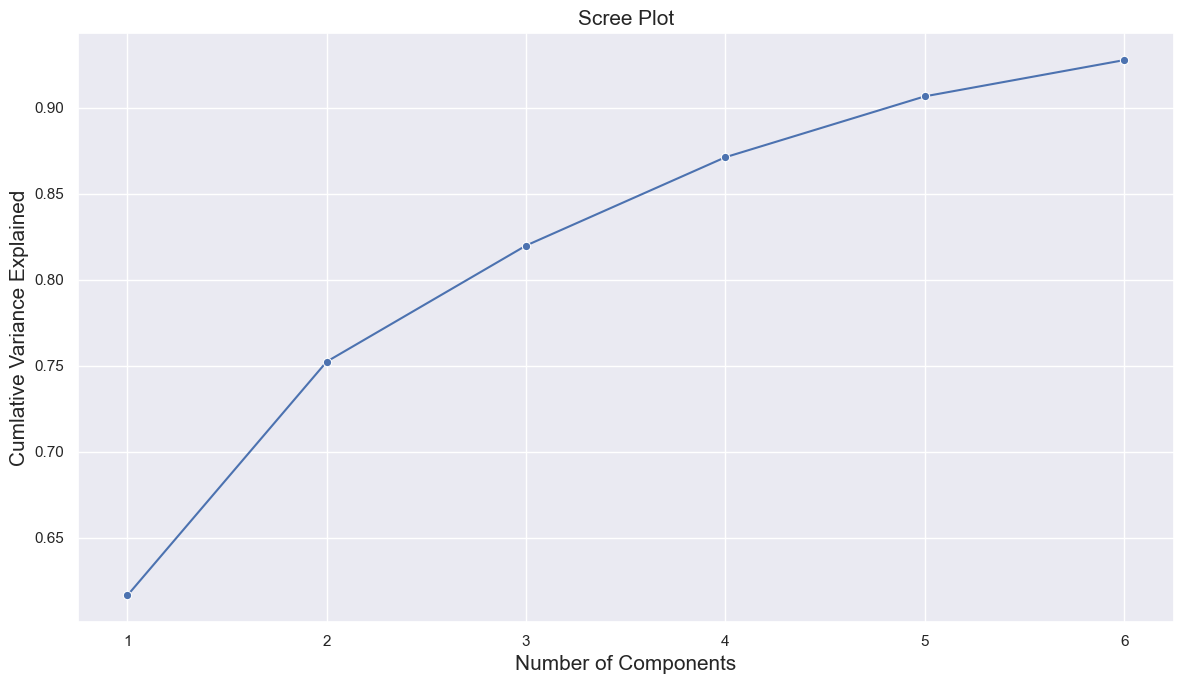

In [421]:
plt.figure(figsize=(12,7))
sns.lineplot(y=cum_var_exp,x=range(1,len(cum_var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Cumlative Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.tight_layout()
plt.savefig('scree_6_cumsum.jpg')

plt.show()

In [411]:
df_pca_loading = pd.DataFrame(pca.components_.round(2),columns=list(df_pca_scaled))
df_pca_loading.shape

(6, 57)

In [413]:
df_pca_loading.T

,0,1,2,3,4,5
No_HH,0.15,-0.12,0.10,0.07,-0.02,-0.06
TOT_M,0.16,-0.08,-0.03,0.05,-0.05,-0.08
TOT_F,0.16,-0.09,0.03,0.07,-0.03,-0.07
M_06,0.16,-0.02,-0.07,0.03,-0.08,-0.11
F_06,0.16,-0.01,-0.06,0.01,-0.08,-0.10
M_SC,0.14,-0.08,-0.03,0.01,-0.18,-0.06
F_SC,0.14,-0.08,0.02,0.01,-0.17,-0.05
M_ST,0.02,0.06,0.30,0.08,0.43,0.20
F_ST,0.02,0.06,0.32,0.07,0.43,0.18
M_LIT,0.16,-0.10,-0.03,0.09,-0.03,-0.08


In [344]:
from matplotlib.patches import Rectangle

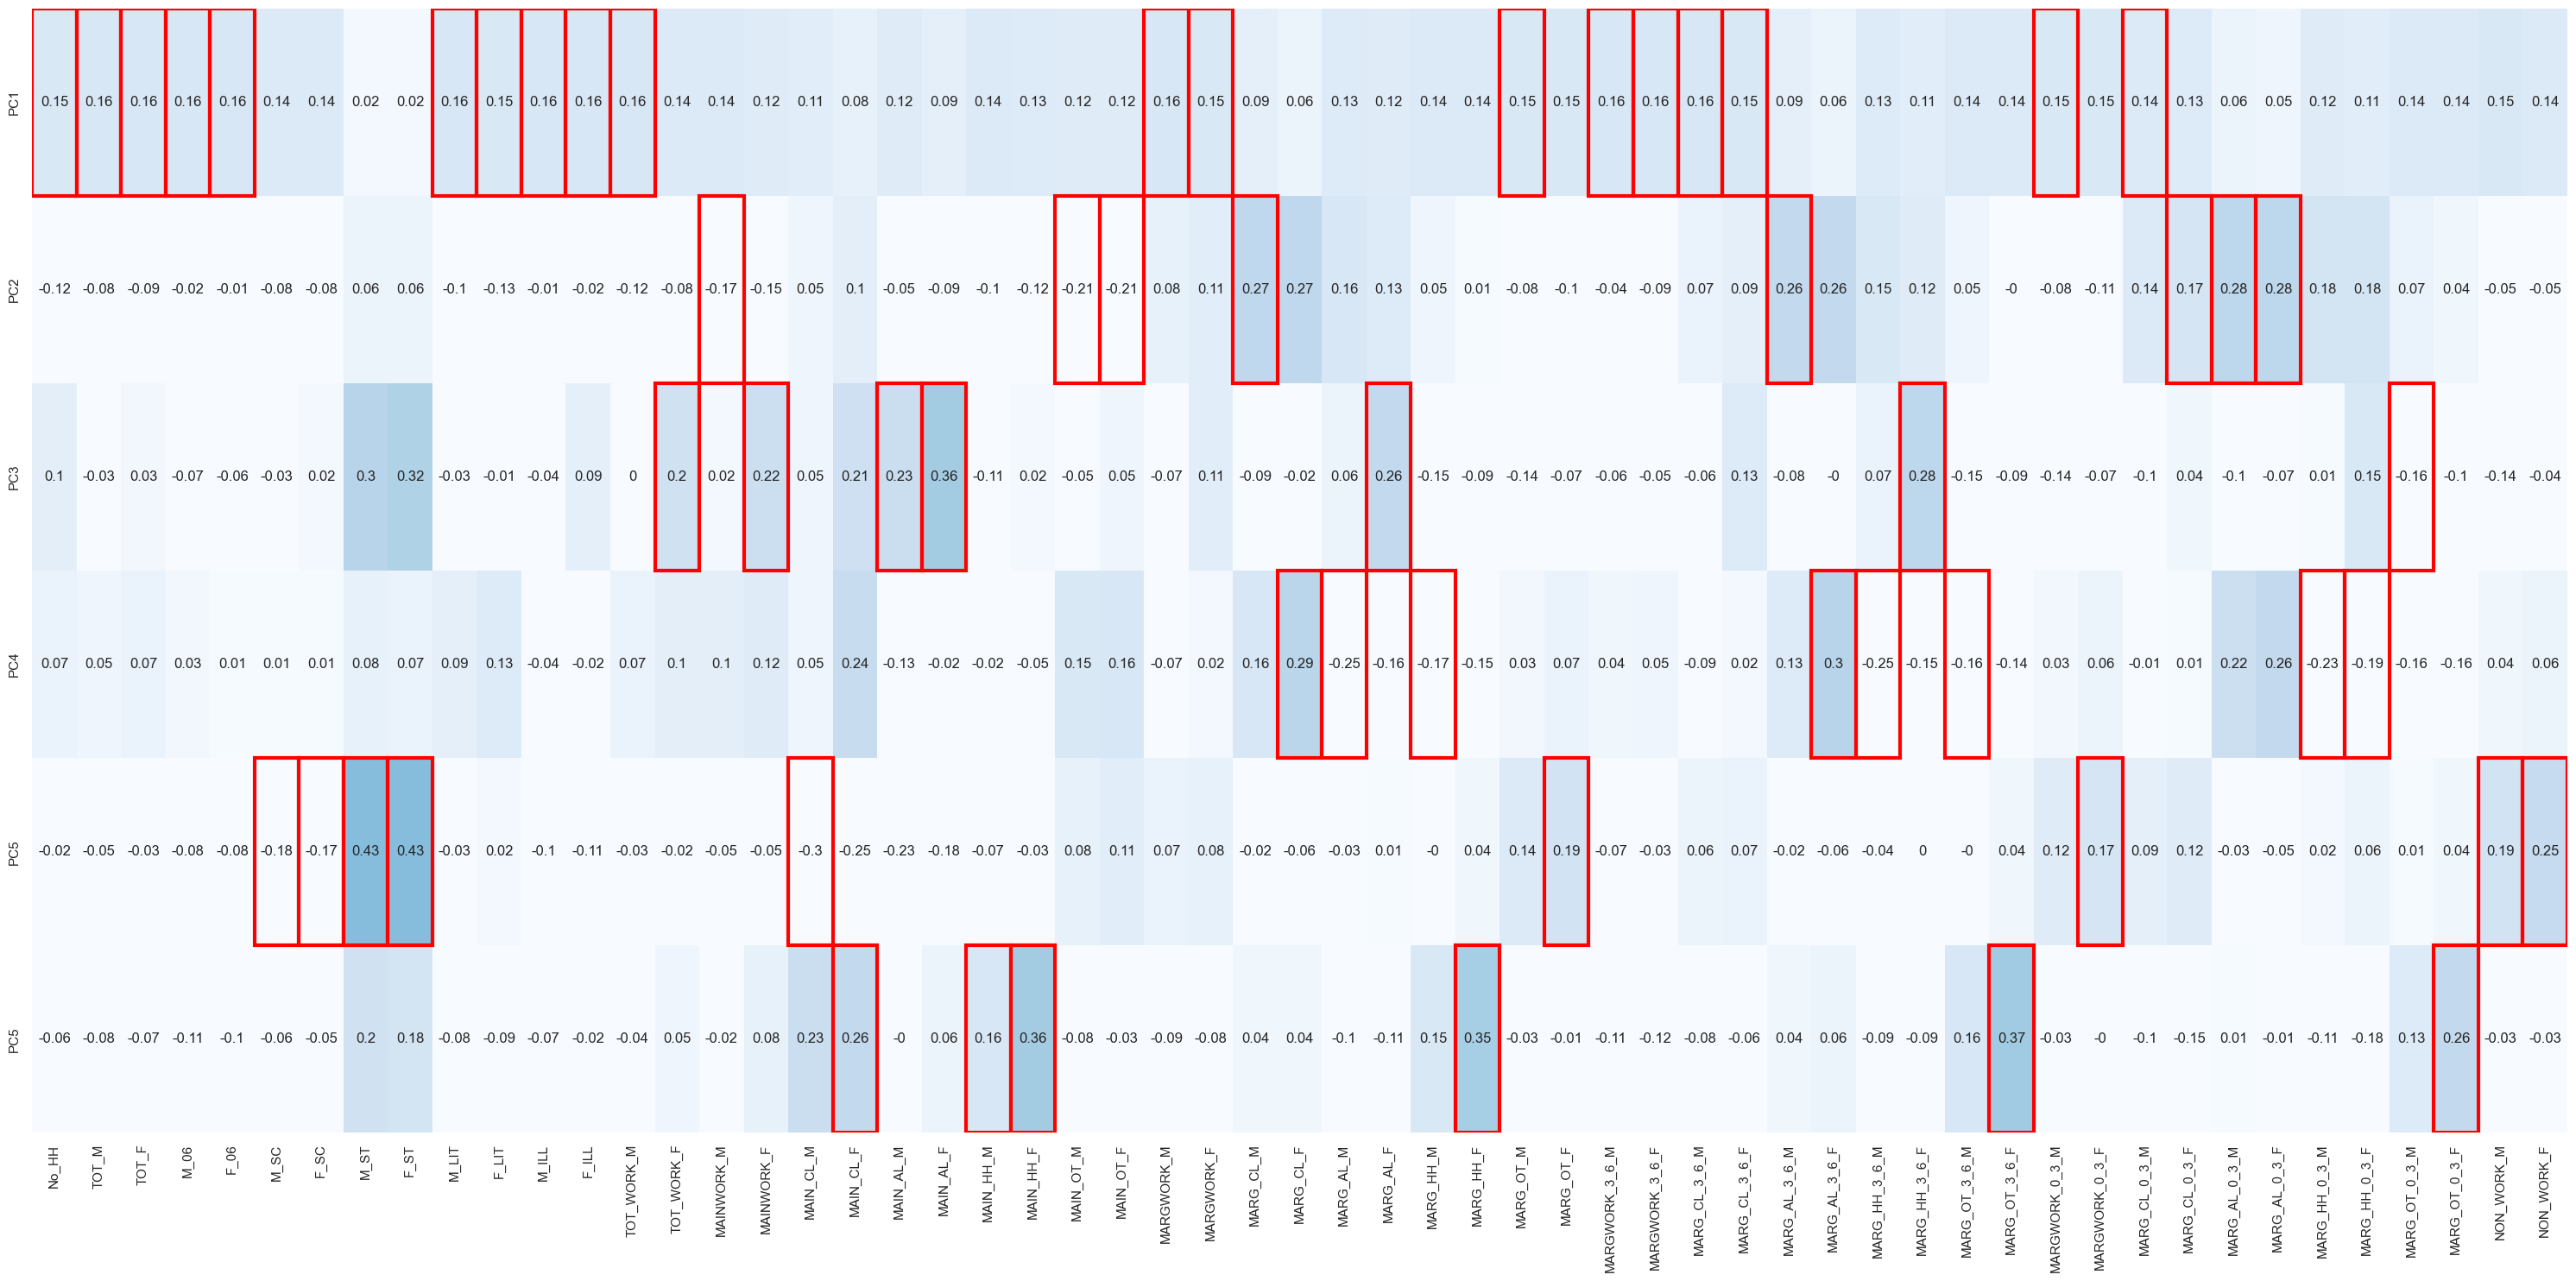

In [458]:
fig,ax = plt.subplots(figsize=(30, 15), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC1','PC2','PC3','PC4','PC5','PC5'])
plt.tight_layout()
column_max = df_pca_loading.abs().idxmax(axis=0)

for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=3))
plt.savefig('PC_components.jpg')
plt.show()

In [495]:
pc1_cols = column_max[column_max == 0].index.tolist()
pc2_cols = column_max[column_max == 1].index.tolist()
pc3_cols = column_max[column_max == 2].index.tolist()
pc4_cols = column_max[column_max == 3].index.tolist()
pc5_cols = column_max[column_max == 4].index.tolist()
pc6_cols = column_max[column_max == 5].index.tolist()

In [350]:
df_extracted_loadings = pd.DataFrame(pca.components_.T,
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6'],
                                    index = df_pca_scaled.columns)

In [352]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.150237,-0.115287,0.103180,0.074622,-0.015401,-0.064114
TOT_M,0.160522,-0.076787,-0.029706,0.050540,-0.054964,-0.076640
TOT_F,0.159558,-0.091114,0.034324,0.067355,-0.032032,-0.072525
M_06,0.157613,-0.017730,-0.065176,0.027072,-0.081270,-0.108668
F_06,0.157938,-0.012012,-0.060278,0.014851,-0.076328,-0.100658
M_SC,0.144513,-0.075767,-0.031688,0.007019,-0.176904,-0.056666
F_SC,0.144668,-0.083882,0.024432,0.012197,-0.165584,-0.048954
M_ST,0.020579,0.057669,0.304044,0.080970,0.429280,0.199007
F_ST,0.020071,0.056227,0.318858,0.070049,0.429934,0.183270
M_LIT,0.156657,-0.102100,-0.028268,0.087068,-0.026587,-0.075214


In [499]:
df_extracted_loadings.PC1[pc1_cols]

No_HH             0.150237
TOT_M             0.160522
TOT_F             0.159558
M_06              0.157613
F_06              0.157938
M_LIT             0.156657
F_LIT             0.146500
M_ILL             0.155355
F_ILL             0.159196
TOT_WORK_M        0.155016
MARGWORK_M        0.157409
MARGWORK_F        0.149269
MARG_OT_M         0.150881
MARGWORK_3_6_M    0.159369
MARGWORK_3_6_F    0.157407
MARG_CL_3_6_M     0.158435
MARG_CL_3_6_F     0.149881
MARGWORK_0_3_M    0.150922
MARG_CL_0_3_M     0.143658
Name: PC1, dtype: float64

In [501]:
df_extracted_loadings.PC2[pc2_cols]

MAINWORK_M      -0.167457
MAIN_OT_M       -0.208063
MAIN_OT_F       -0.211979
MARG_CL_M        0.273126
MARG_AL_3_6_M    0.263357
MARG_CL_0_3_F    0.166220
MARG_AL_0_3_M    0.275625
MARG_AL_0_3_F    0.280543
Name: PC2, dtype: float64

In [503]:
df_extracted_loadings.PC3[pc3_cols]

TOT_WORK_F       0.196666
MAINWORK_F       0.215881
MAIN_AL_M        0.231973
MAIN_AL_F        0.363843
MARG_AL_F        0.261036
MARG_HH_3_6_F    0.284826
MARG_OT_0_3_M   -0.156288
Name: PC3, dtype: float64

In [505]:
df_extracted_loadings.PC4[pc4_cols]

MARG_CL_F        0.294797
MARG_AL_M       -0.247792
MARG_HH_M       -0.165794
MARG_AL_3_6_F    0.296008
MARG_HH_3_6_M   -0.249295
MARG_OT_3_6_M   -0.164305
MARG_HH_0_3_M   -0.232525
MARG_HH_0_3_F   -0.187199
Name: PC4, dtype: float64

In [507]:
df_extracted_loadings.PC5[pc5_cols]

M_SC             -0.176904
F_SC             -0.165584
M_ST              0.429280
F_ST              0.429934
MAIN_CL_M        -0.298306
MARG_OT_F         0.190008
MARGWORK_0_3_F    0.166101
NON_WORK_M        0.188305
NON_WORK_F        0.249229
Name: PC5, dtype: float64

In [511]:
df_extracted_loadings.PC6[pc6_cols]

MAIN_CL_F        0.257364
MAIN_HH_M        0.156218
MAIN_HH_F        0.361935
MARG_HH_F        0.348818
MARG_OT_3_6_F    0.368728
MARG_OT_0_3_F    0.261812
Name: PC6, dtype: float64

In [367]:
pd.DataFrame(df_extracted_loadings.PC6.sort_values(
...
...     ascending=False
... ))

,PC6
MARG_OT_3_6_F,0.368728
MAIN_HH_F,0.361935
MARG_HH_F,0.348818
MARG_OT_0_3_F,0.261812
MAIN_CL_F,0.257364
MAIN_CL_M,0.227653
M_ST,0.199007
F_ST,0.183270
MARG_OT_3_6_M,0.157772
MAIN_HH_M,0.156218


In [371]:
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [428]:
pca_final_df = pd.DataFrame(pca_final, columns = df_extracted_loadings.columns)
pca_final_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-5.466381,0.357639,-1.485300,-1.129767,0.372636,-0.491453
1,-5.486838,-0.060817,-1.927128,-1.547540,0.008429,0.917737
2,-7.249267,-0.181424,-0.432522,-0.106929,0.555028,0.174293
3,-7.564761,-0.613779,-0.744722,-0.679678,0.274297,-0.100205
4,-5.164355,1.860077,-1.093917,0.826343,0.988561,0.094523


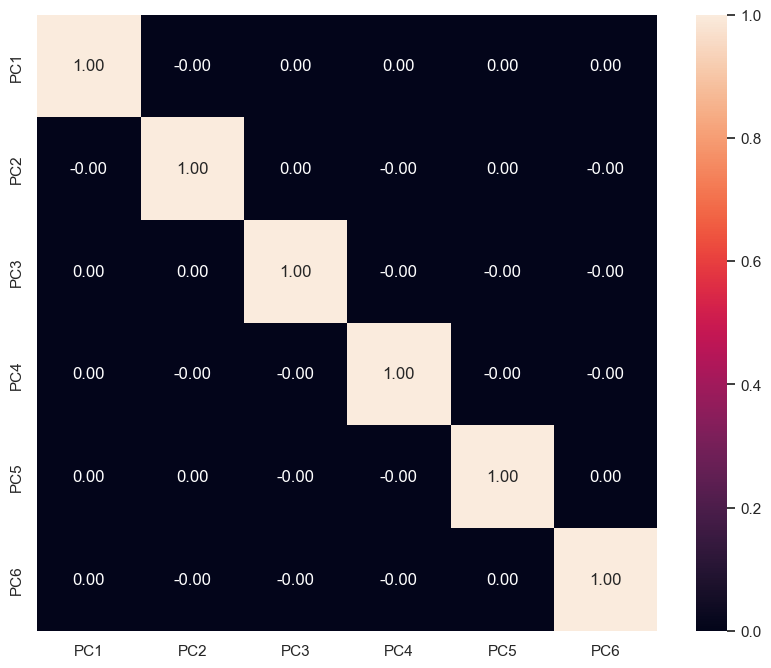

In [379]:
plt.figure(figsize = (10,8))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

In [381]:
df600 = pd.concat([df_pca_cat, pca_final_df], axis=1)

In [383]:
df600.head()

,State,Area Name,PC1,PC2,PC3,PC4,PC5,PC6
0,Jammu & Kashmir,Kupwara,-5.466381,0.357639,-1.485300,-1.129767,0.372636,-0.491453
1,Jammu & Kashmir,Badgam,-5.486838,-0.060817,-1.927128,-1.547540,0.008429,0.917737
2,Jammu & Kashmir,Leh(Ladakh),-7.249267,-0.181424,-0.432522,-0.106929,0.555028,0.174293
3,Jammu & Kashmir,Kargil,-7.564761,-0.613779,-0.744722,-0.679678,0.274297,-0.100205
4,Jammu & Kashmir,Punch,-5.164355,1.860077,-1.093917,0.826343,0.988561,0.094523


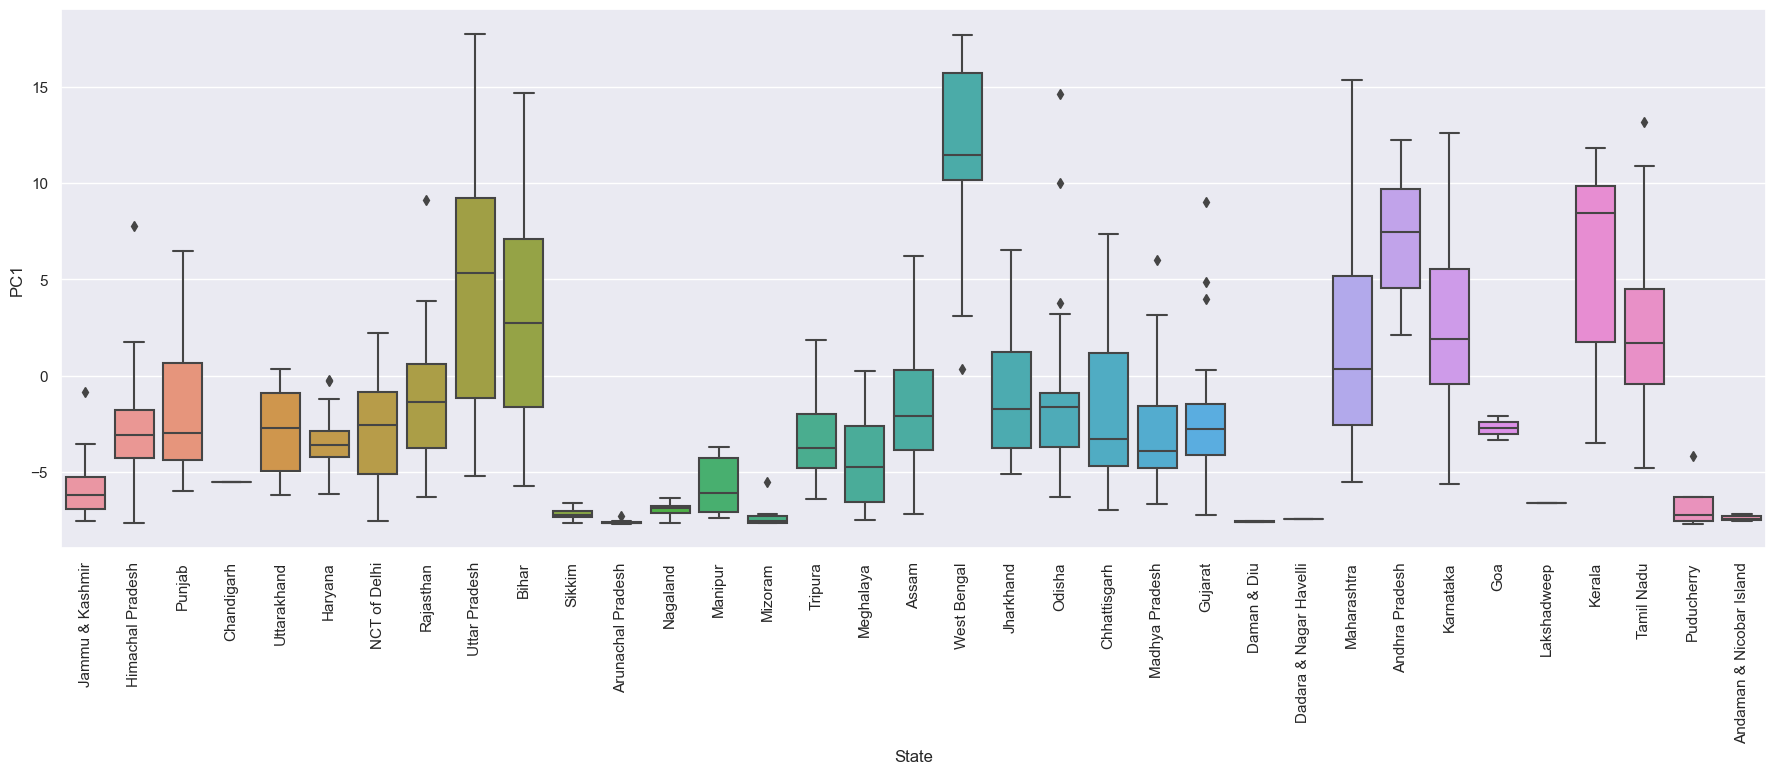

In [385]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='PC1', data=df600)
plt.xticks(rotation = 90)
plt.show()

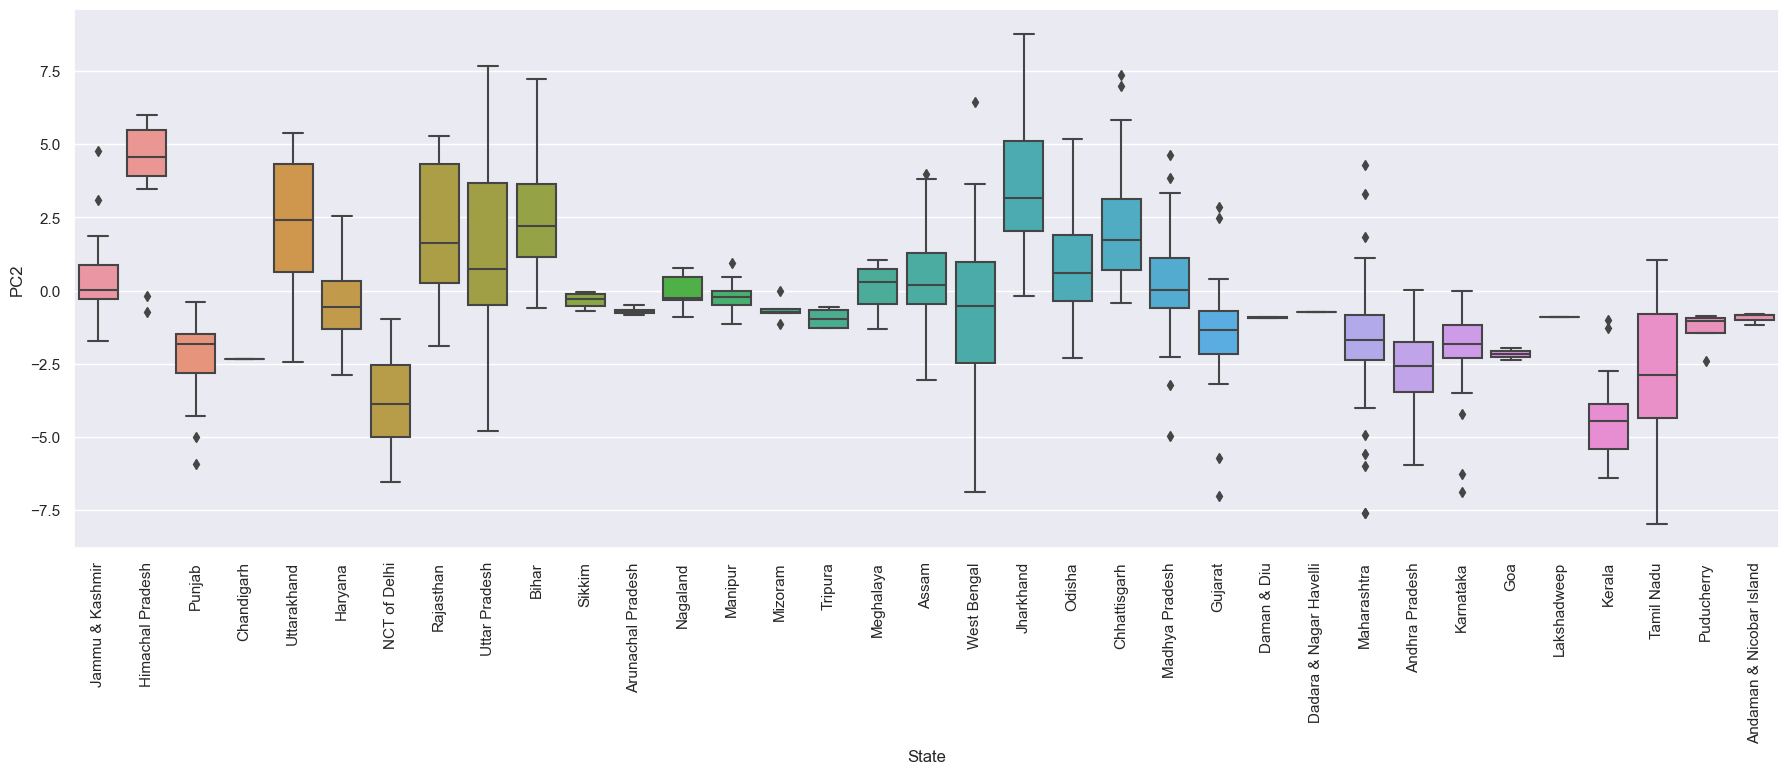

In [387]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='PC2', data=df600)
plt.xticks(rotation = 90)
plt.show()

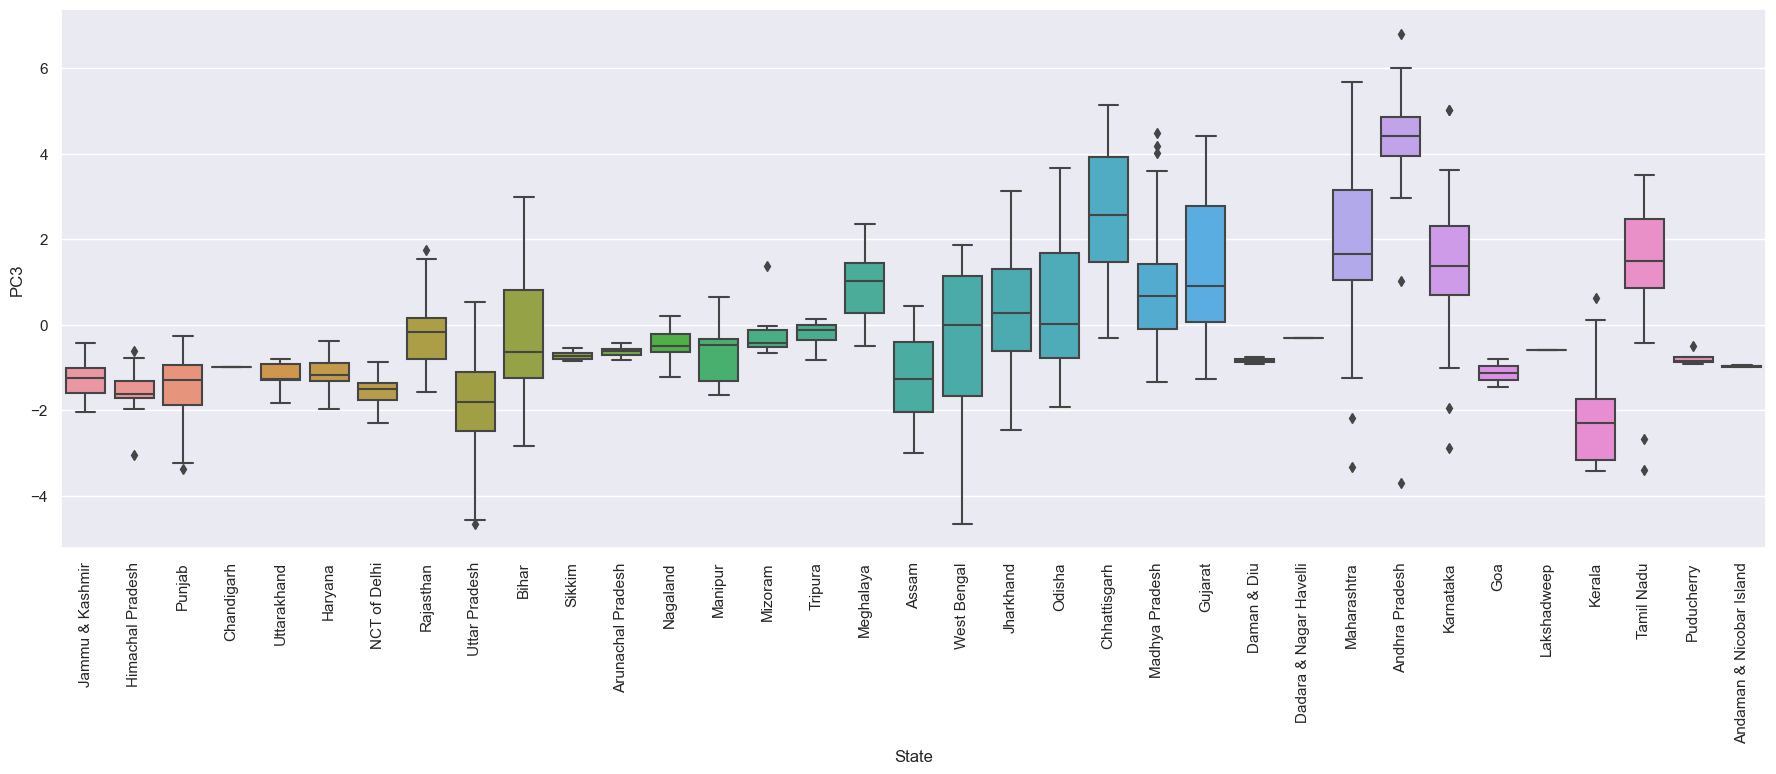

In [389]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='PC3', data=df600)
plt.xticks(rotation = 90)
plt.show()

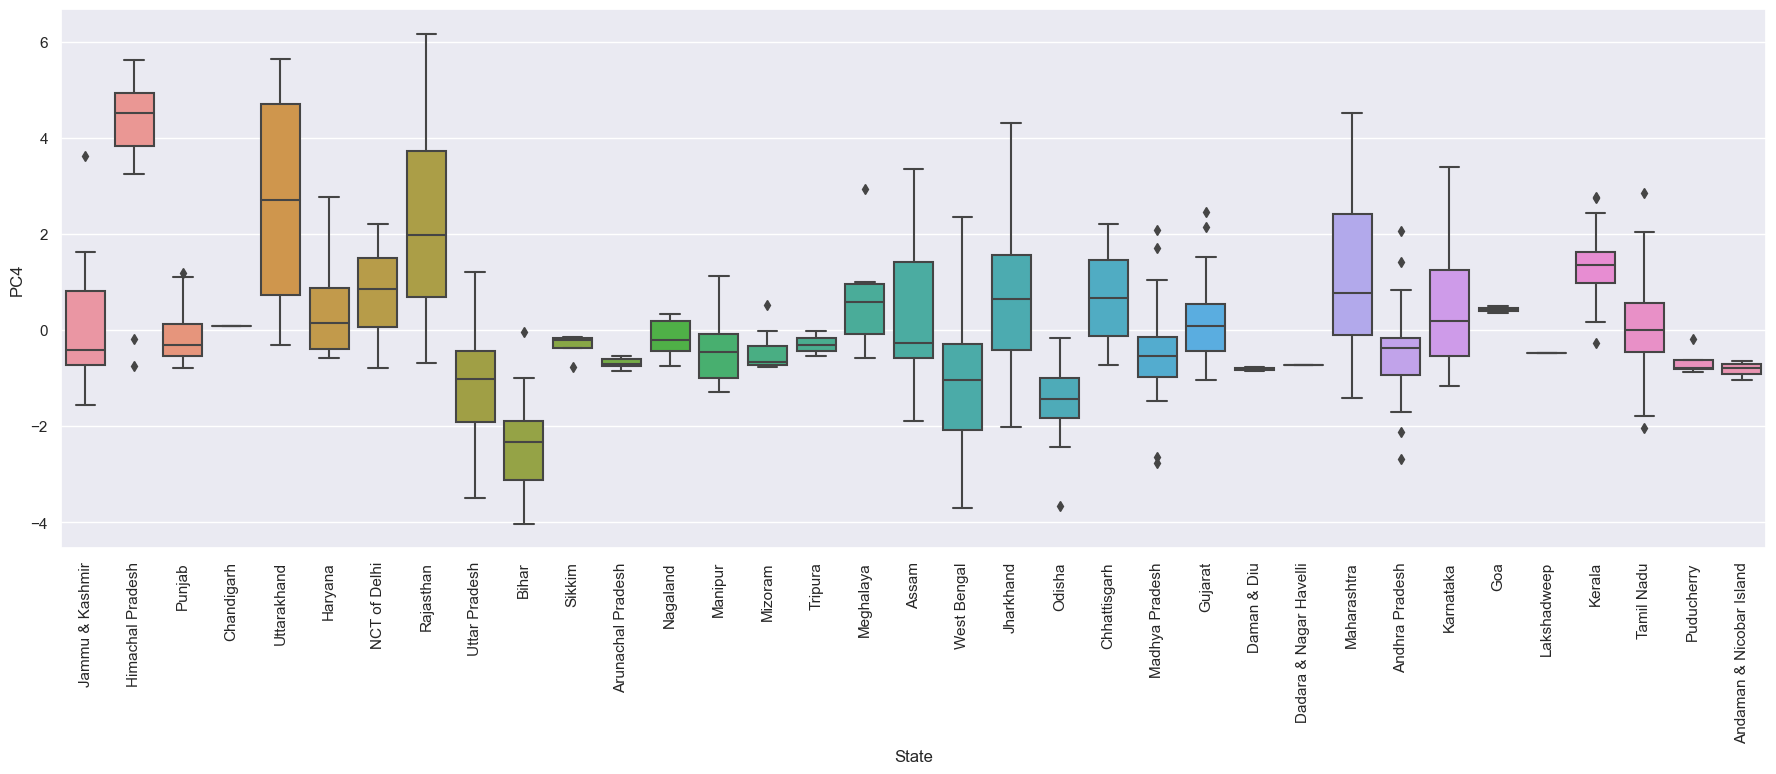

In [391]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='PC4', data=df600)
plt.xticks(rotation = 90)
plt.show()

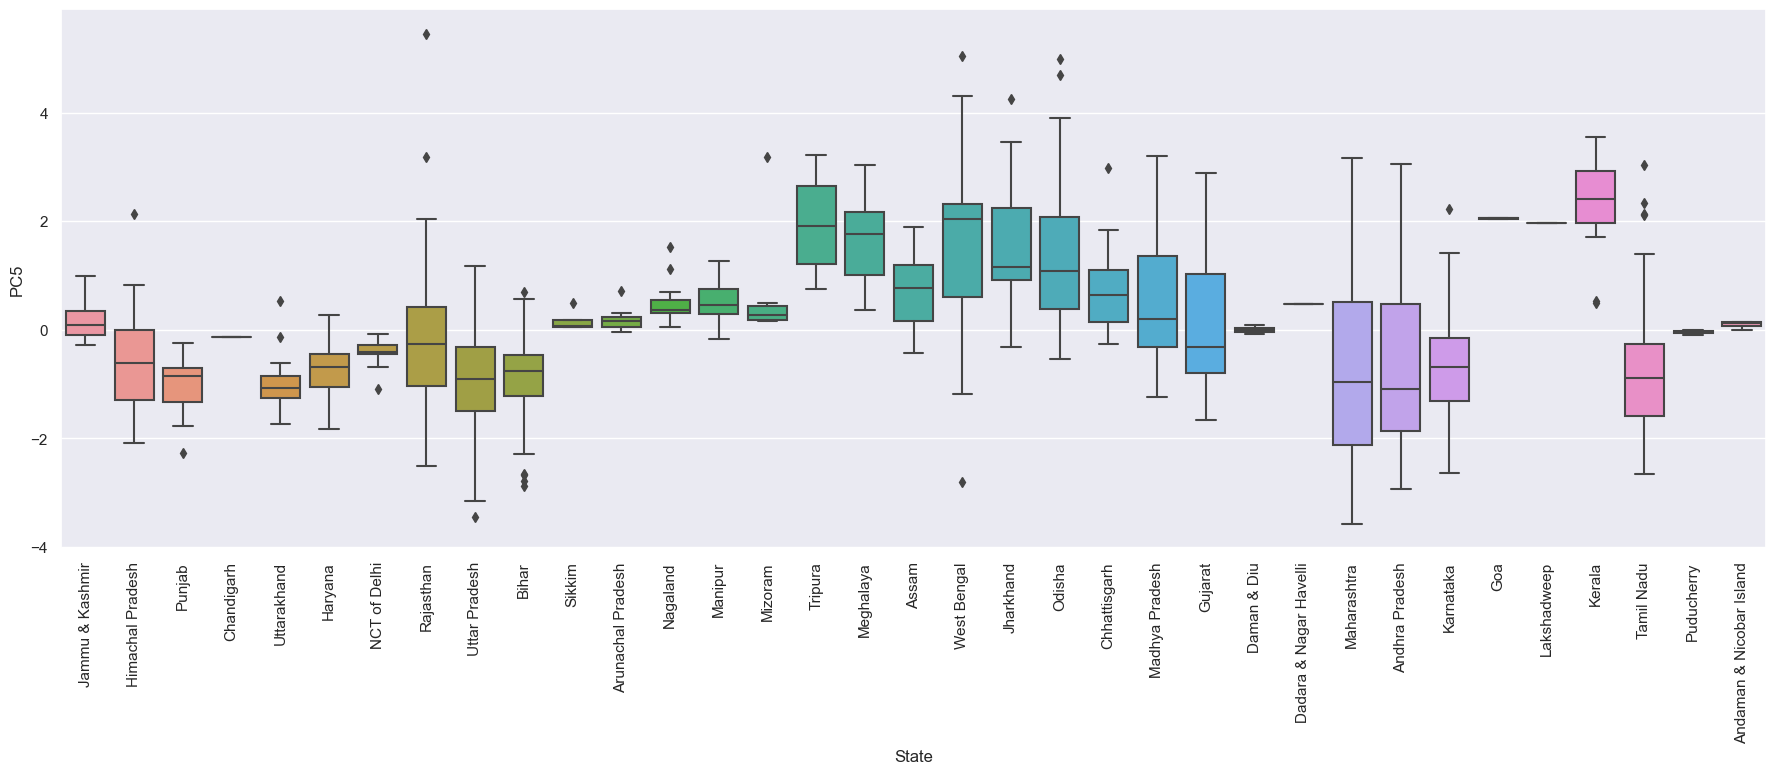

In [392]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='PC5', data=df600)
plt.xticks(rotation = 90)
plt.show()

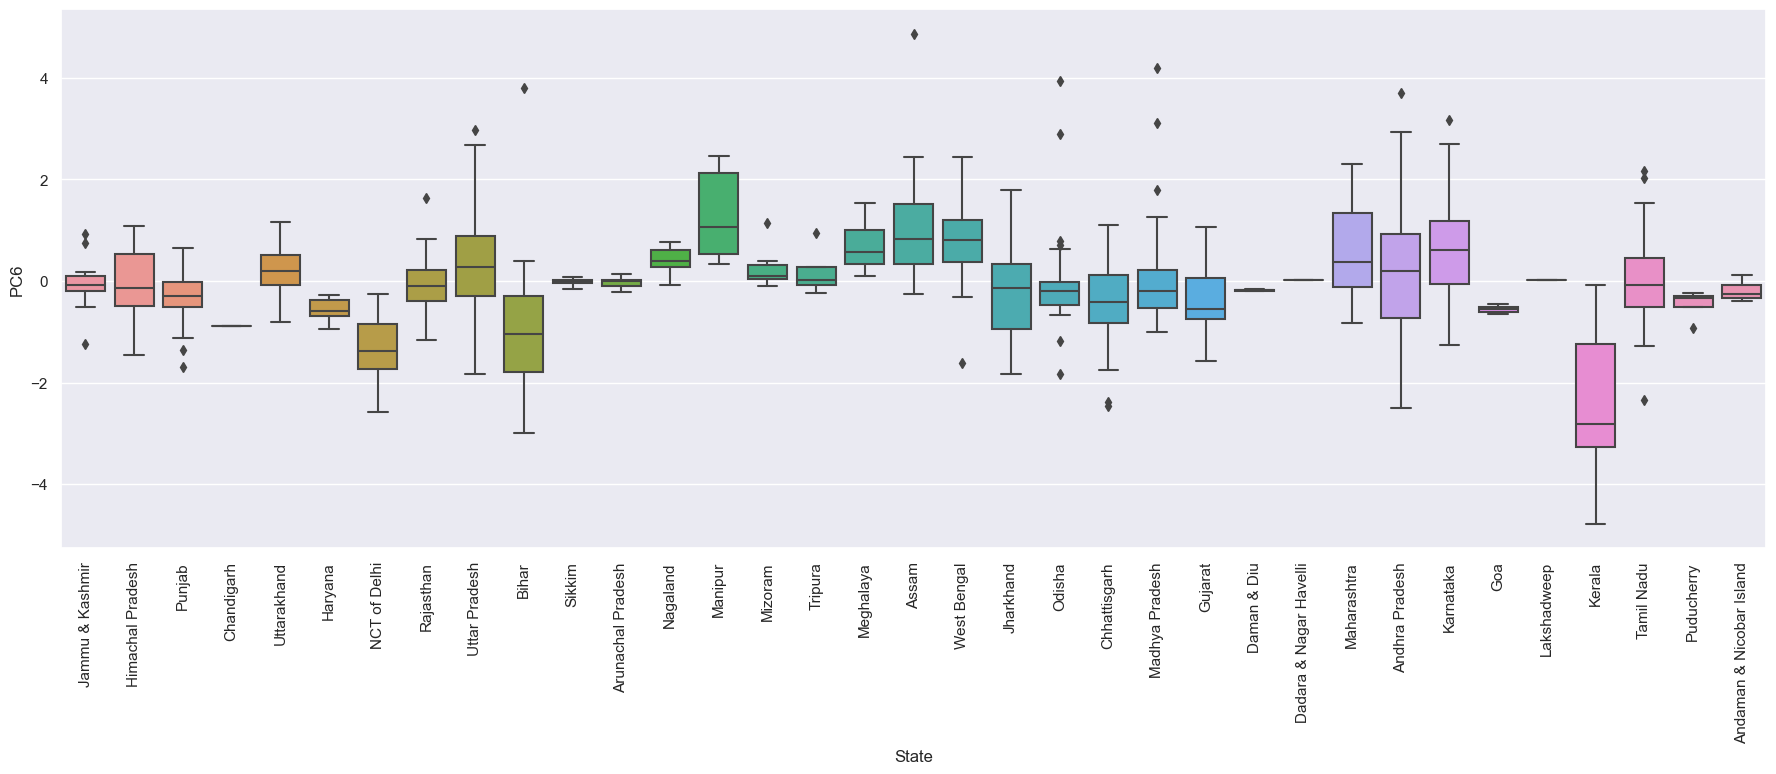

In [395]:
fig,ax = plt.subplots(figsize=(22,7))
sns.boxplot(x='State',y='PC6', data=df600)
plt.xticks(rotation = 90)
plt.show()

In [517]:
df900 = df_extracted_loadings.PC1.round(decimals = 2)

In [519]:
df900.sort_values(ascending=False)

MARG_CL_3_6_M     0.16
F_ILL             0.16
TOT_F             0.16
M_06              0.16
F_06              0.16
MARGWORK_3_6_F    0.16
MARGWORK_M        0.16
TOT_M             0.16
TOT_WORK_M        0.16
M_LIT             0.16
MARGWORK_3_6_M    0.16
M_ILL             0.16
No_HH             0.15
MARG_CL_3_6_F     0.15
MARG_OT_M         0.15
MARGWORK_F        0.15
MARG_OT_F         0.15
MARGWORK_0_3_F    0.15
MARGWORK_0_3_M    0.15
F_LIT             0.15
NON_WORK_M        0.15
MARG_OT_3_6_M     0.14
MARG_OT_3_6_F     0.14
MARG_CL_0_3_M     0.14
MARG_OT_0_3_M     0.14
MARG_HH_F         0.14
MARG_OT_0_3_F     0.14
MARG_HH_M         0.14
NON_WORK_F        0.14
MAINWORK_M        0.14
M_SC              0.14
MAIN_HH_M         0.14
F_SC              0.14
TOT_WORK_F        0.14
MARG_AL_M         0.13
MAIN_HH_F         0.13
MARG_CL_0_3_F     0.13
MARG_HH_3_6_M     0.13
MAIN_OT_F         0.12
MAIN_OT_M         0.12
MAIN_AL_M         0.12
MARG_HH_0_3_M     0.12
MARG_AL_F         0.12
MAINWORK_F 

In [543]:
for i in range(len(df900)):
    print(f'{df900.index[i]} * {df900[0]}')


No_HH * 0.15
TOT_M * 0.15
TOT_F * 0.15
M_06 * 0.15
F_06 * 0.15
M_SC * 0.15
F_SC * 0.15
M_ST * 0.15
F_ST * 0.15
M_LIT * 0.15
F_LIT * 0.15
M_ILL * 0.15
F_ILL * 0.15
TOT_WORK_M * 0.15
TOT_WORK_F * 0.15
MAINWORK_M * 0.15
MAINWORK_F * 0.15
MAIN_CL_M * 0.15
MAIN_CL_F * 0.15
MAIN_AL_M * 0.15
MAIN_AL_F * 0.15
MAIN_HH_M * 0.15
MAIN_HH_F * 0.15
MAIN_OT_M * 0.15
MAIN_OT_F * 0.15
MARGWORK_M * 0.15
MARGWORK_F * 0.15
MARG_CL_M * 0.15
MARG_CL_F * 0.15
MARG_AL_M * 0.15
MARG_AL_F * 0.15
MARG_HH_M * 0.15
MARG_HH_F * 0.15
MARG_OT_M * 0.15
MARG_OT_F * 0.15
MARGWORK_3_6_M * 0.15
MARGWORK_3_6_F * 0.15
MARG_CL_3_6_M * 0.15
MARG_CL_3_6_F * 0.15
MARG_AL_3_6_M * 0.15
MARG_AL_3_6_F * 0.15
MARG_HH_3_6_M * 0.15
MARG_HH_3_6_F * 0.15
MARG_OT_3_6_M * 0.15
MARG_OT_3_6_F * 0.15
MARGWORK_0_3_M * 0.15
MARGWORK_0_3_F * 0.15
MARG_CL_0_3_M * 0.15
MARG_CL_0_3_F * 0.15
MARG_AL_0_3_M * 0.15
MARG_AL_0_3_F * 0.15
MARG_HH_0_3_M * 0.15
MARG_HH_0_3_F * 0.15
MARG_OT_0_3_M * 0.15
MARG_OT_0_3_F * 0.15
NON_WORK_M * 0.15
NON_WORK_F * 0.

In [549]:
linear_equation = ''
for variable, coefficient in df900.items():
    linear_equation += f" + {coefficient:.2f} * {variable}"

linear_equation = linear_equation[3:]

In [547]:
linear_equation

'0.15 * No_HH + 0.16 * TOT_M + 0.16 * TOT_F + 0.16 * M_06 + 0.16 * F_06 + 0.14 * M_SC + 0.14 * F_SC + 0.02 * M_ST + 0.02 * F_ST + 0.16 * M_LIT + 0.15 * F_LIT + 0.16 * M_ILL + 0.16 * F_ILL + 0.16 * TOT_WORK_M + 0.14 * TOT_WORK_F + 0.14 * MAINWORK_M + 0.12 * MAINWORK_F + 0.11 * MAIN_CL_M + 0.08 * MAIN_CL_F + 0.12 * MAIN_AL_M + 0.09 * MAIN_AL_F + 0.14 * MAIN_HH_M + 0.13 * MAIN_HH_F + 0.12 * MAIN_OT_M + 0.12 * MAIN_OT_F + 0.16 * MARGWORK_M + 0.15 * MARGWORK_F + 0.09 * MARG_CL_M + 0.06 * MARG_CL_F + 0.13 * MARG_AL_M + 0.12 * MARG_AL_F + 0.14 * MARG_HH_M + 0.14 * MARG_HH_F + 0.15 * MARG_OT_M + 0.15 * MARG_OT_F + 0.16 * MARGWORK_3_6_M + 0.16 * MARGWORK_3_6_F + 0.16 * MARG_CL_3_6_M + 0.15 * MARG_CL_3_6_F + 0.09 * MARG_AL_3_6_M + 0.06 * MARG_AL_3_6_F + 0.13 * MARG_HH_3_6_M + 0.11 * MARG_HH_3_6_F + 0.14 * MARG_OT_3_6_M + 0.14 * MARG_OT_3_6_F + 0.15 * MARGWORK_0_3_M + 0.15 * MARGWORK_0_3_F + 0.14 * MARG_CL_0_3_M + 0.13 * MARG_CL_0_3_F + 0.06 * MARG_AL_0_3_M + 0.05 * MARG_AL_0_3_F + 0.12 * MARG_HH